In [1]:
library("here")
library(devtools)
library(Seurat)
library(harmony)
library(RcppML)
library(reshape2)
library(tidyverse)
load_all('/home/jpm73279/Socrates')
data_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output/"

set.seed(12345)



here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Attaching SeuratObject

Attaching sp

Loading required package: Rcpp

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
Warning message:
“package ‘ggplot2’ was built under R version 4.2.1”
Warning message:
“package ‘tibble’ was built under R version 4.2.1”
Warning message:
“package ‘purrr’ was built under R version 4.2.1”
Warning message:
“package ‘stringr’ was built under R version 4.2.1”
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks 

In [2]:

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

In [3]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/"

bed_intersections <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/Sorghum_leaf.sciATAC_rep2.unique.tn5.merged.V2.sorted.bed"

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"Sbicolorv5.1.primaryTrs.gff3")
chr <- paste0(reference_genome_path,"Sorghum_bicolor_var_BTx623.chrom.size")
pre <- "Sb.Leaf_merged_reps"



#Load Object
Sb.subcluster <- loadBEDandGenomeData(bed_intersections, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/Sorghum_leaf.sciATAC_rep2.unique.tn5.merged.V2.sorted.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.primaryTrs.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data



In [4]:
marker_list_sb_file <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/markers/Sb.leaf_markers_maize.all.bed"
marker_list_sb <- read_delim(marker_list_sb_file, delim='\t', 
                                       col_names = TRUE)

Rows: 190 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): chr, geneID, name, type, tissue
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
loaded_socrates_data <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb_leaf.merged_replicates.QC_V2.rds")

In [13]:
loaded_socrates_data$cluster_acrs

List of 14
 $ counts         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:15815280] 0 6 11 18 24 39 47 64 65 80 ...
  .. ..@ p       : int [1:17538] 0 6824 16055 20943 24616 28077 37276 49954 56549 65565 ...
  .. ..@ Dim     : int [1:2] 58071 17537
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:58071] "Chr01_100016_100517" "Chr01_10004430_10004931" "Chr01_10010583_10011084" "Chr01_10011297_10011798" ...
  .. .. ..$ : chr [1:17537] "BC:Z:ATCACGGGCTACGTATAACTGATACCG-Sorghum_leaf.sciATAC_rep1" "BC:Z:CGATGTAGTCAACTAAGATTCCTACCG-Sorghum_leaf.sciATAC_rep1" "BC:Z:TTAGGCAGTCAACAAAAGGTAGCGTTT-Sorghum_leaf.sciATAC_rep1" "BC:Z:TGACCACTTGTAAAACACGTACGAGCT-Sorghum_leaf.sciATAC_rep1" ...
  .. ..@ x       : num [1:15815280] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ meta           :'data.frame':	17537 obs. of  24 variables:
  ..$ cellID          : chr [1:17537] "BC:Z:ATCACGGGCTACGTATAACTGATACCG-Sorghum_leaf.sciATAC_rep1" "BC:Z:CGATGTAGTCAACTAAGATTCCT

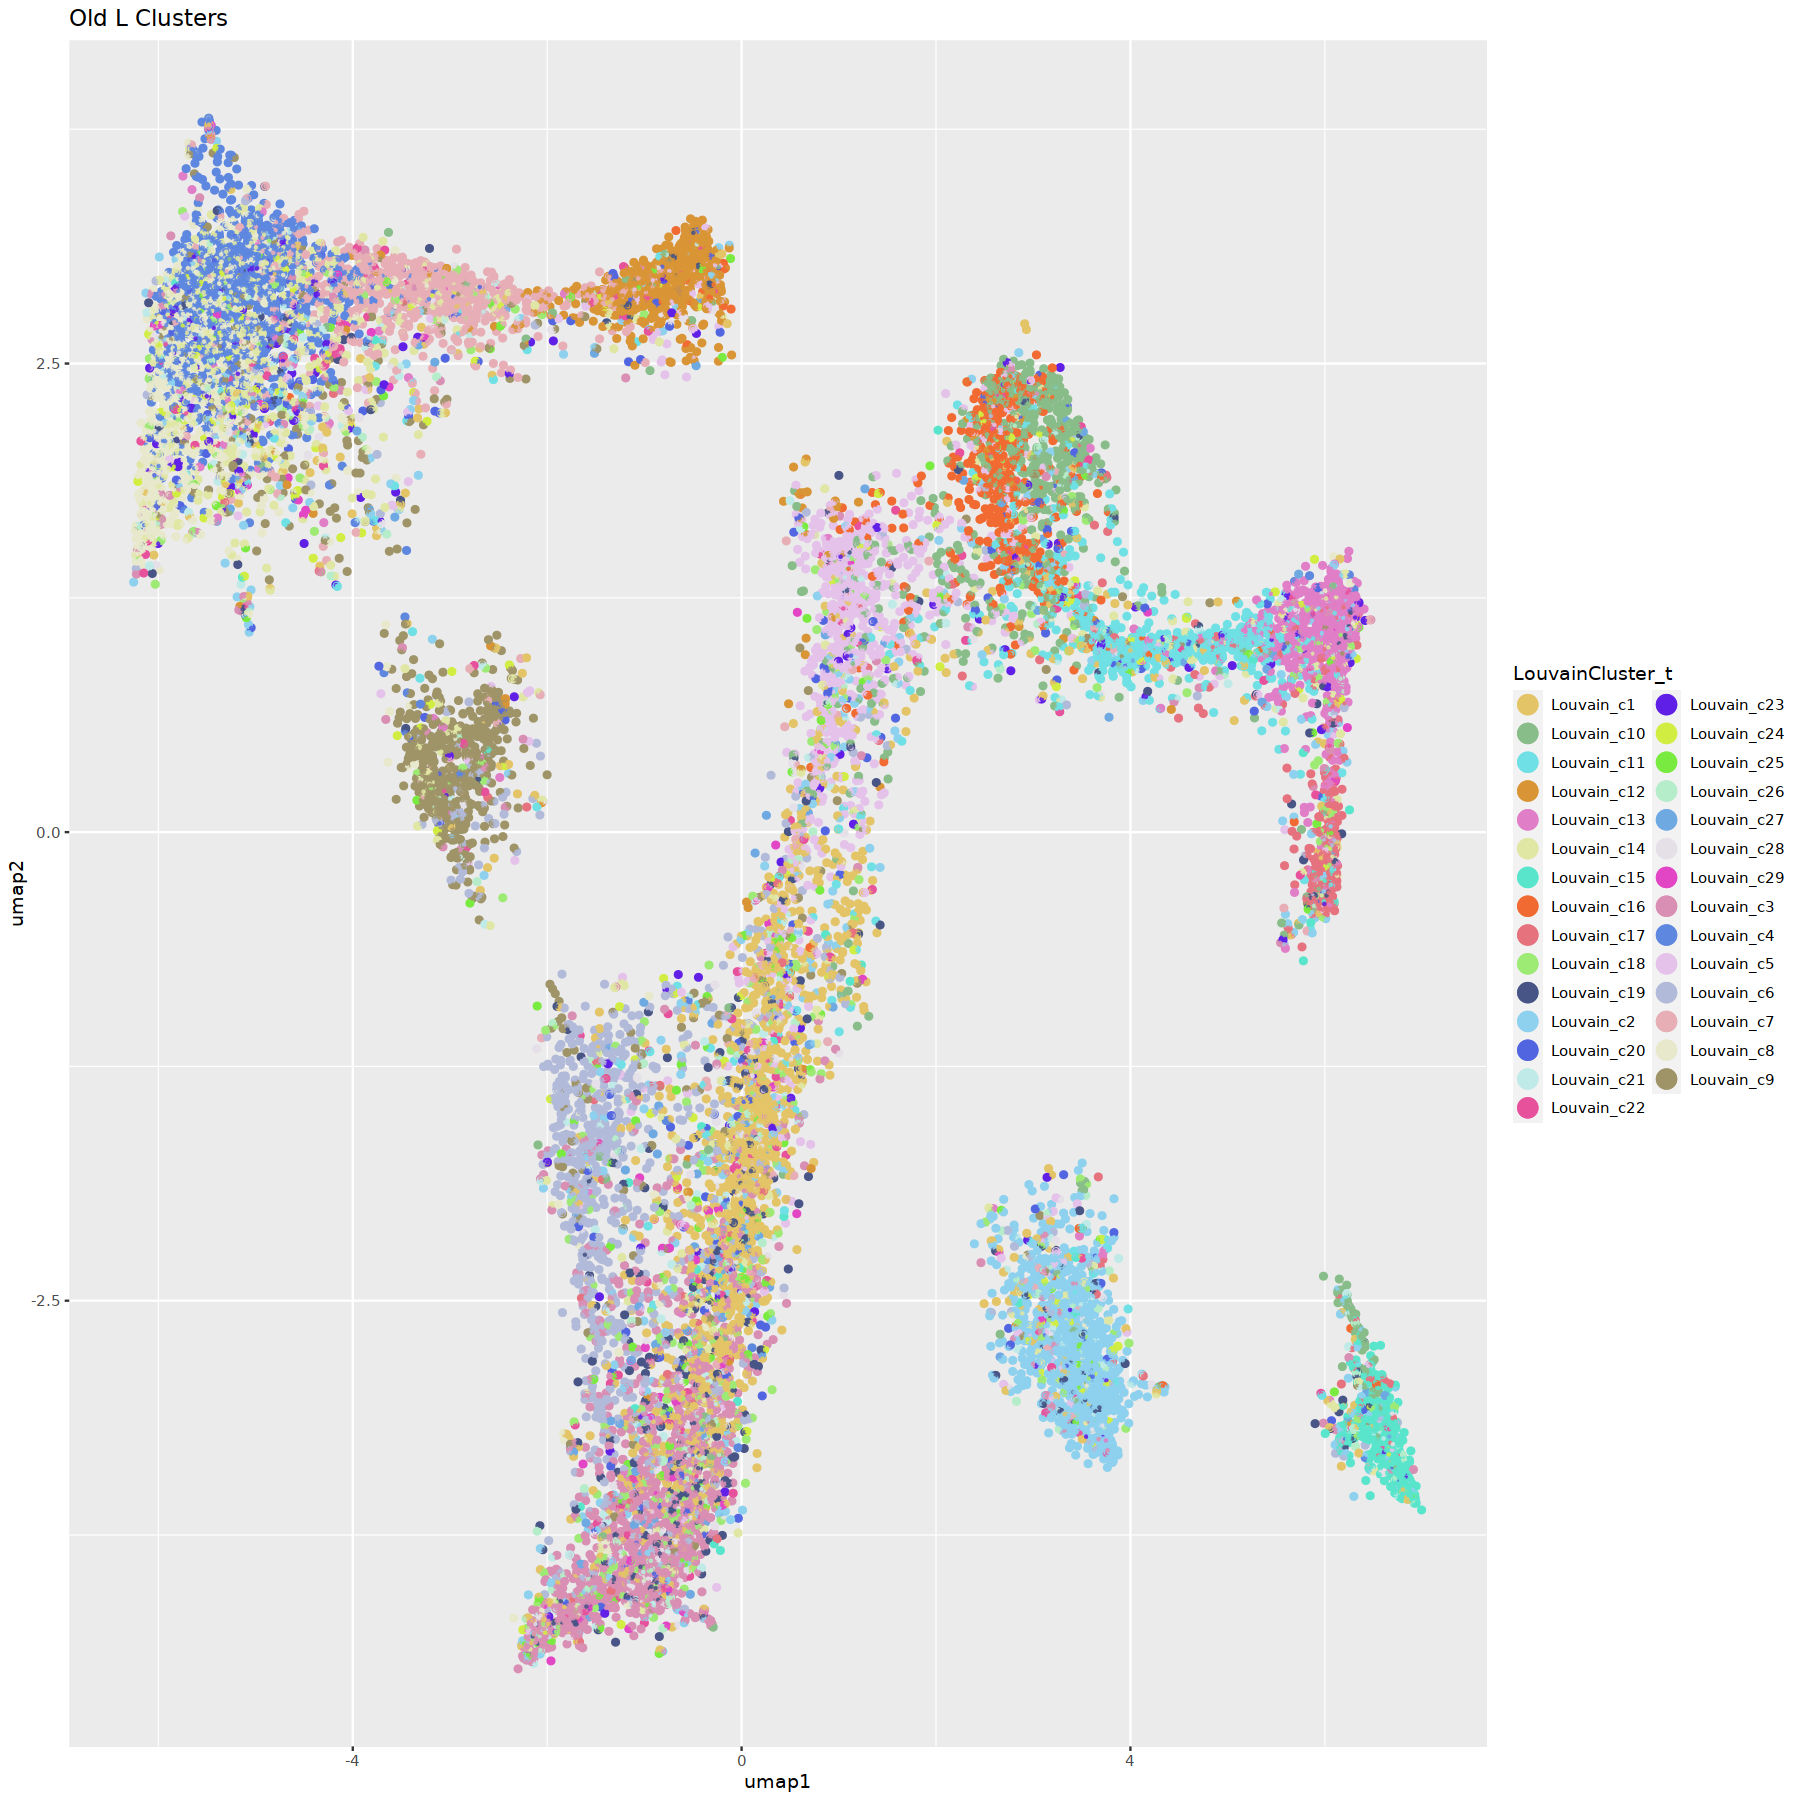

In [25]:
sb.subcluster_vasculature$meta  %>% 
    ggplot(., aes(umap1, umap2, color = LouvainCluster_t)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")


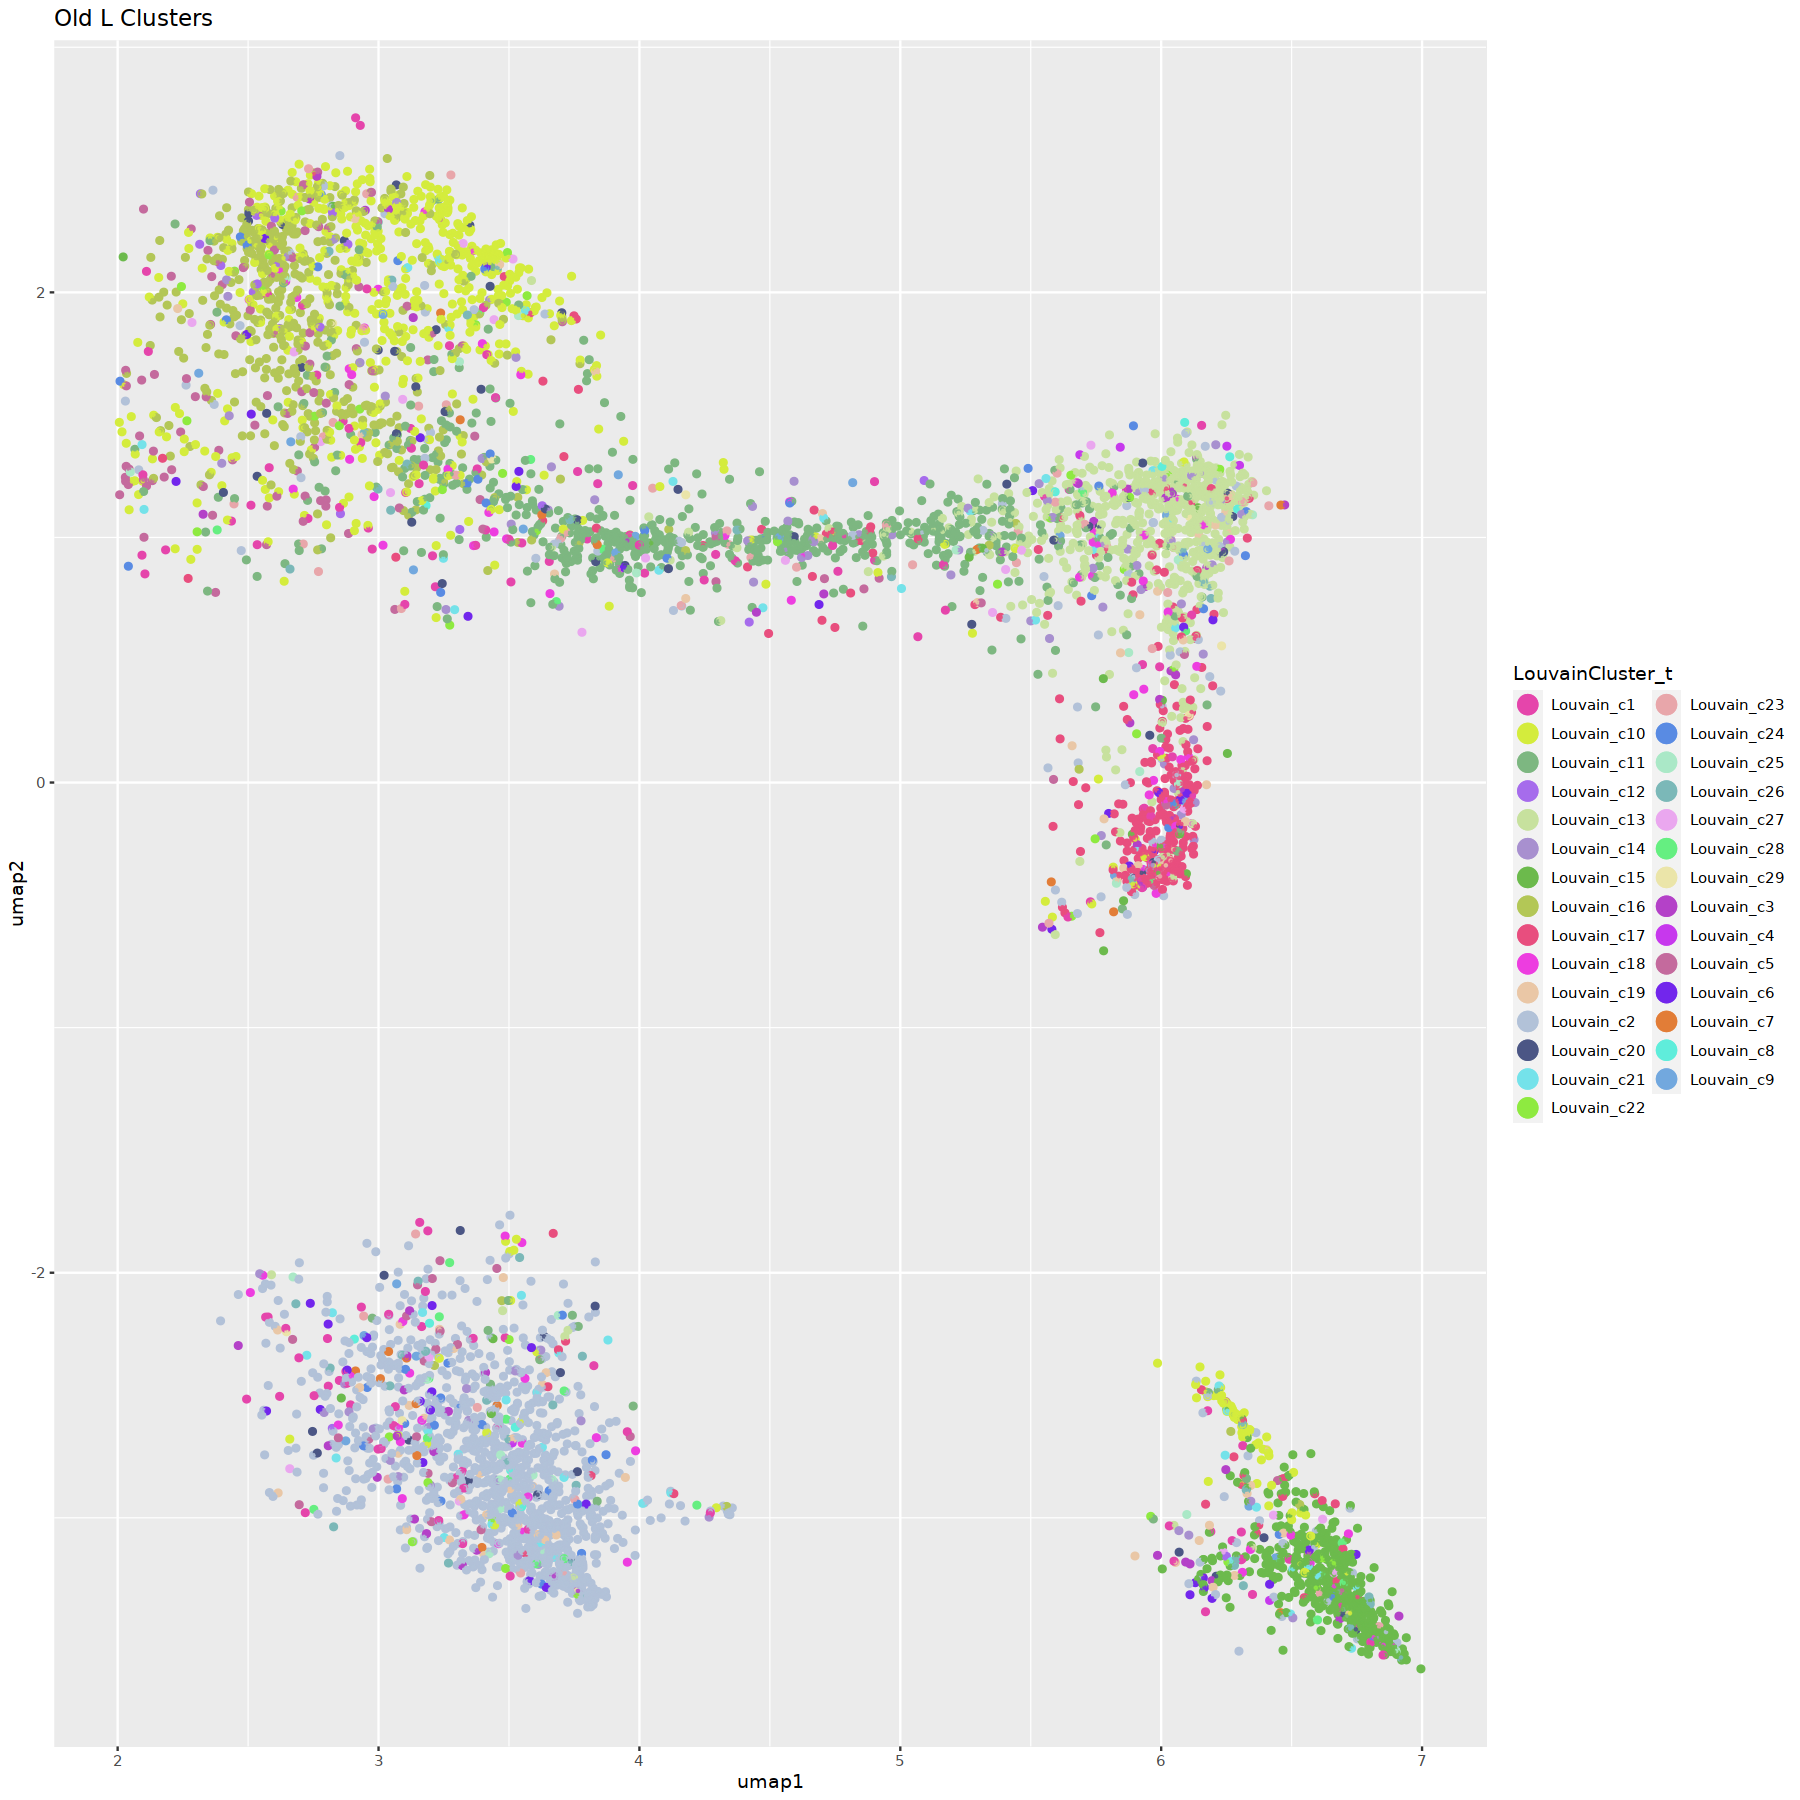

In [28]:
library(cowplot)
library(randomcoloR)
library(dplyr)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


sb.subcluster_vasculature <- Sb.subcluster

sb.subcluster_vasculature$meta <- loaded_socrates_data$cluster_acrs

clusters <- c("Louvain_c10","Louvain_c19","Louvain_c21","Louvain_c23","Louvain_c18","Louvain_c10",
  "Louvain_c28","Louvain_c2","Louvain_c23","Louvain_c11","Louvain_c24")

#c("LouvainC_18","LouvainC_5","LouvainC_7","LouvainC_32",
#  "LouvainC_24","LouvainC_21","LouvainC_8","LouvainC_20","LouvainC_23")

sb.subcluster_vasculature$meta  %>% 
    filter(umap1 > 2) %>% 
    ggplot(., aes(umap1, umap2, color = LouvainCluster_t)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

chosen_subcluster <- sb.subcluster_vasculature$meta %>% 
    filter(umap1 > 2)

In [29]:
meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
sb.subcluster_vasculature$meta <- meta_df
sb.subcluster_vasculature$meta.v3 <- meta_df

sb.subcluster_vasculature$acr <- read.table("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.Louvain_cluster.iter_1/Sb.V3_annot.500bp_peaks.bed")

In [31]:
sb.subcluster_vasculature <- generateMatrix(sb.subcluster_vasculature, 
                                              filtered=FALSE,
                                              peaks = TRUE,
                                            organelle_scaffolds= c("Pt", "Mt"),
                                            blacklist = "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/sb_prelim.final_blacklist.bed",
                                              verbose=TRUE)

sb.subcluster_vasculature <- convertSparseData(sb.subcluster_vasculature, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [33]:
str(sb.subcluster_vasculature)

List of 2
 $ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:8446044] 0 6 13 21 27 32 45 46 51 62 ...
  .. ..@ p       : int [1:5536] 0 9908 23729 31063 35968 40752 51635 54401 62187 68501 ...
  .. ..@ Dim     : int [1:2] 69875 5535
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:69875] "Chr01_100016_100517" "Chr01_10004430_10004931" "Chr01_10010583_10011084" "Chr01_10011297_10011798" ...
  .. .. ..$ : chr [1:5535] "BC:Z:ATCACGGGCTACGTATAACTGATACCG-Sorghum_leaf.sciATAC_rep1" "BC:Z:CGATGTAGTCAACTAAGATTCCTACCG-Sorghum_leaf.sciATAC_rep1" "BC:Z:TTAGGCAGTCAACAAAAGGTAGCGTTT-Sorghum_leaf.sciATAC_rep1" "BC:Z:TGACCACTTGTAAAACACGTACGAGCT-Sorghum_leaf.sciATAC_rep1" ...
  .. ..@ x       : num [1:8446044] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ meta  :'data.frame':	5535 obs. of  24 variables:
  ..$ cellID          : chr [1:5535] "BC:Z:ATCACGGGCTACGTATAACTGATACCG-Sorghum_leaf.sciATAC_rep1" "BC:Z:CGATGTAGTCAACTAAGATTCCTACCG-Sorghum_leaf.sciATAC_

In [34]:
?cleanData

ℹ Rendering development documentation for "cleanData"


In [43]:
# clean sparse counts matrix ---------------------------------------------
sb.subcluster_vasculature.clean <- cleanData(sb.subcluster_vasculature, 
                     min.t=0.01,  # minimum feature frequency across cells
                     max.t=0.1, # maximum feature frequency across cells
                     verbose=T)

   * Input: cells = 5535 | peaks = 69875

   * Filtered: cells = 5036 | peaks = 34646



 - non-linear dimensionality reduction with UMAP ...

14:02:37 UMAP embedding parameters a = 1.896 b = 0.8006

14:02:37 Read 5036 rows and found 49 numeric columns

14:02:37 Using Annoy for neighbor search, n_neighbors = 15

14:02:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:02:38 Writing NN index file to temp file /tmp/Rtmpjyj5gt/file19b0e28a66173

14:02:38 Searching Annoy index using 16 threads, search_k = 1500

14:02:38 Annoy recall = 100%

14:02:40 Commencing smooth kNN distance calibration using 16 threads
 with target n_neighbors = 15

14:02:43 Initializing from normalized Laplacian + noise (using irlba)

14:02:43 Commencing optimization for 500 epochs, with 114868 positive edges

14:03:02 Optimization finished

 - filtering outliers in UMAP manifold (z-

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4948
Number of edges: 248113

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.6469
Number of communities: 13
Elapsed time: 5 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



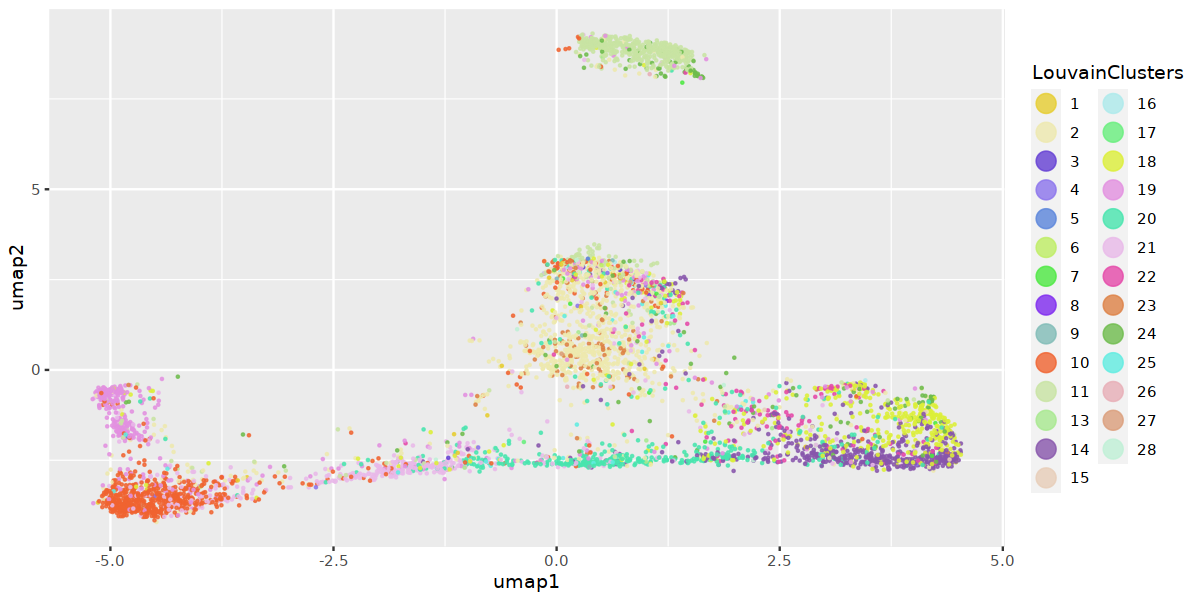

In [121]:
# normalize with TFIDF ---------------------------------------------------
sb.subcluster_vasculature.clean <- tfidf(sb.subcluster_vasculature.clean)

# project with NMF -------------------------------------------------------
sb.subcluster_vasculature.clean <- reduceDims(sb.subcluster_vasculature.clean,
                      method="SVD", 
                      n.pcs=50, 
                      num.var=5000,
                      doL2=TRUE,
                      svd_slotName="SVD")

# reduce to 2-dimensions with UMAP ---------------------------------------
sb.subcluster_vasculature.clean <- projectUMAP(sb.subcluster_vasculature.clean, 
                       verbose=T,
                       k.near=15,
                       m.dist=0.01,
                       svd_slotName="SVD")

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

ggplot(sb.subcluster_vasculature.clean$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

# identify clusters using neighborhood graph -----------------------------
sb.subcluster_vasculature.clean.clusters <- callClusters(sb.subcluster_vasculature.clean, 
                        res=2.3,
                        k.near = 15,
                        min.reads=500,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster_vasculature",
                        cleanCluster=FALSE)

LouvainClusters n()
1  1               699
2  2               678
3  3               612
4  4               543
5  5               451
6  6               309
7  7               281
8  8               281
9  9               273
10 10              252
11 11              197
12 12              193
13 13              179

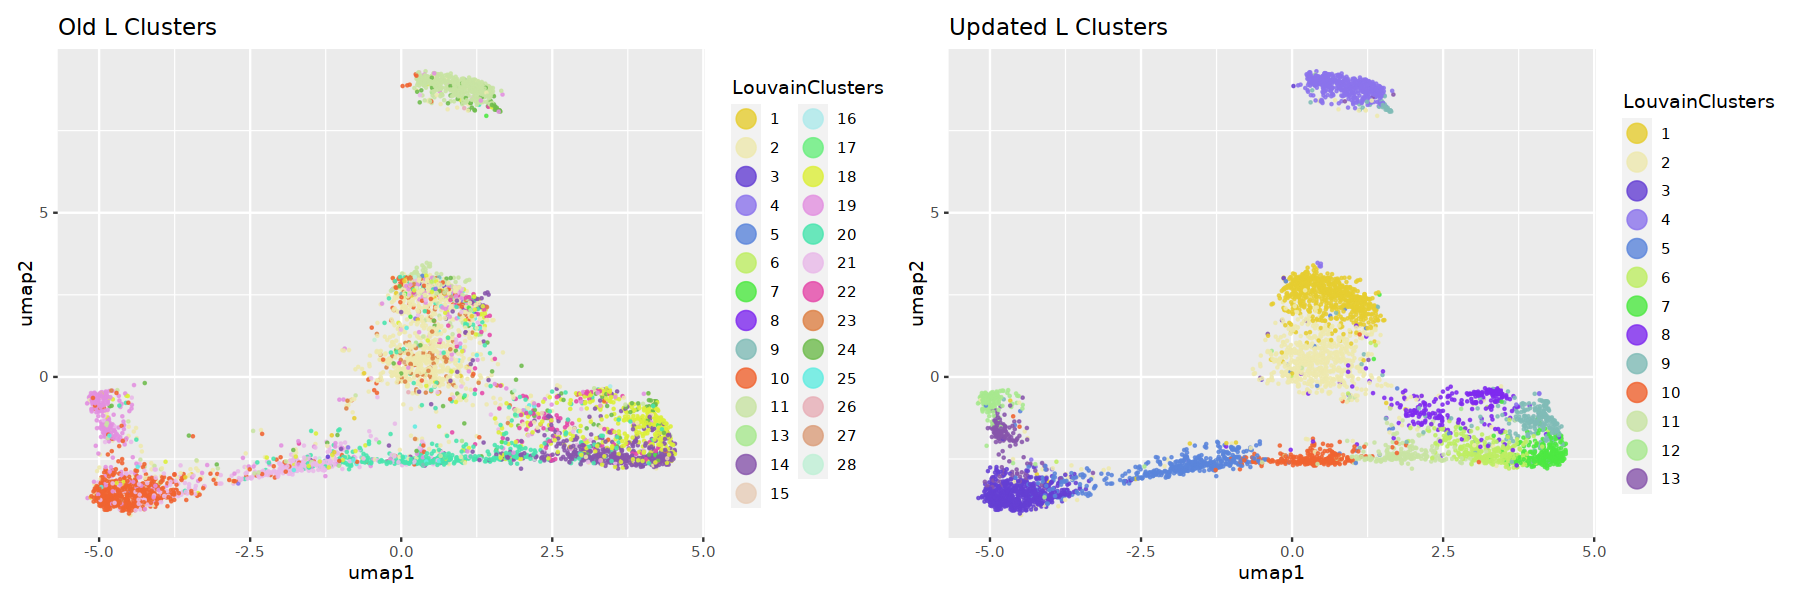

In [122]:
options(repr.plot.width=15, repr.plot.height=5)
old_clusters <- ggplot(sb.subcluster_vasculature.clean.clusters$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(sb.subcluster_vasculature.clean.clusters$sub_cluster_vasculature, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

sb.subcluster_vasculature.clean.clusters$sub_cluster  %>% 
    group_by(LouvainClusters)  %>% 
    summarise(n())

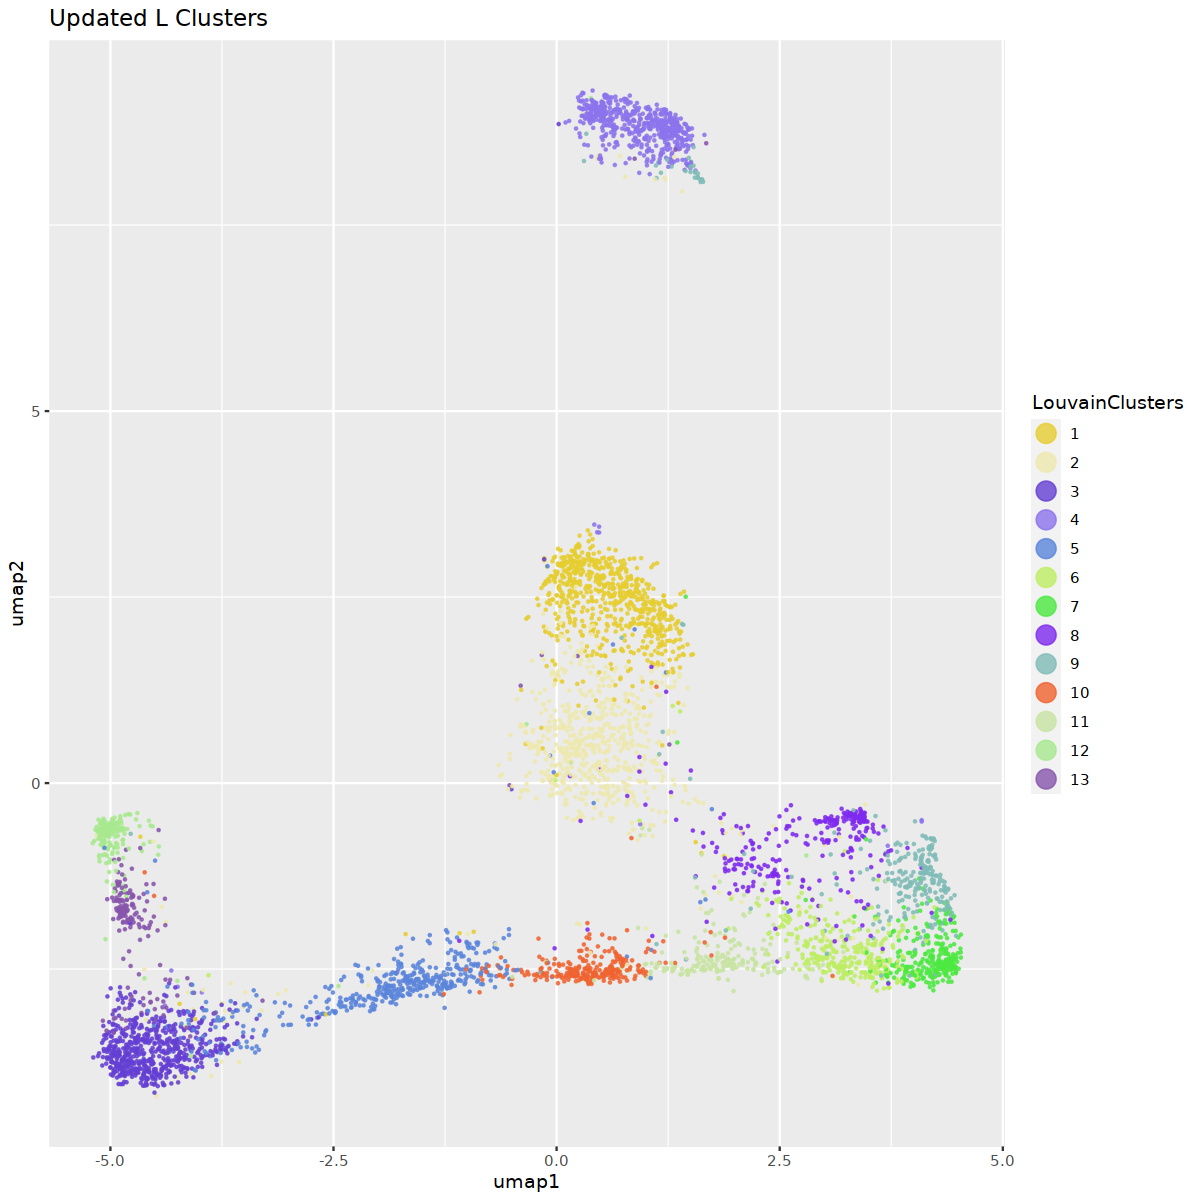

In [128]:
options(repr.plot.width=10, repr.plot.height=10)
new_clusters

In [6]:
library("presto")
run_presto <- function(meta_obj, 
                       meta_slot = "Clusters", 
                       cluster_name = "LouvainClusters", 
                       counts_raw="acr_counts_raw"){
    ### Pull the correct meta datafrom the Socrates Object
    sparse_matrix <- meta_obj[[counts_raw]]
    meta_data <- meta_obj[[meta_slot]]
    
    print(head(as_tibble(meta_data)))
        
    ### Read the Giant Sparse Matrix
    loaded_sparse_matric <- read_delim(sparse_matrix, delim='\t', 
                                       col_names = c("gene_name", "barcode", "accessability"), 
                                       col_types = "ccn")
    
    print(head(loaded_sparse_matric))
    combined_large_w_sparse <- loaded_sparse_matric  %>% 
        filter(gene_name != "Annotation")  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        left_join(., meta_data, by = c("barcode" = "cellID"))  %>% 
        filter(is.na(!!sym(cluster_name)) != TRUE)  %>% 
        arrange(!!sym(cluster_name))
    
    #order <- combined_large_w_sparse[!!sym(cluster_name)]

    combined_large_w_sparse <- combined_large_w_sparse  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        mutate(across(accessability, as.numeric))
    
    
    gene_names <- unique(combined_large_w_sparse$gene_name)
    barcodes <- unique(combined_large_w_sparse$barcode)

    combined_large_w_sparse$row <- match(combined_large_w_sparse$gene_name, gene_names)
    combined_large_w_sparse$col <- match(combined_large_w_sparse$barcode, barcodes)


    UIMatrix <- sparseMatrix(i = combined_large_w_sparse$row,
                         j = combined_large_w_sparse$col,
                         x = combined_large_w_sparse$accessability,
                         dimnames=list(gene_names, barcodes))

    print(head(tibble(barcode = unlist(UIMatrix@Dimnames[2]))))
    barcode_tibble <- tibble(barcode = unlist(UIMatrix@Dimnames[2])) %>% 
        left_join(., as_tibble(meta_data), by = c("barcode" = "cellID"))  %>% 
        filter(is.na(total) != TRUE)
    
    print(dim(barcode_tibble))
    print(dim(UIMatrix))
    
    clust_name <- c(cluster_name)
    garbbed_louv_order <- pull(barcode_tibble,!!sym(clust_name))

    sparse_matrix_test <- wilcoxauc(UIMatrix, garbbed_louv_order)
    
    meta_obj[["presto_marker"]] <- sparse_matrix_test
    
    return(meta_obj)
}

Loading required package: data.table


Attaching package: 'data.table'


The following object is masked from 'package:slam':

    rollup


The following object is masked from 'package:GenomicRanges':

    shift


The following object is masked from 'package:IRanges':

    shift


The following objects are masked from 'package:S4Vectors':

    first, second


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:reshape2':

    dcast, melt




In [125]:
setwd("/scratch/jpm73279/comparative_single_cell/dev_location")
sb.subcluster_vasculature.clean.clusters$all_genes <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.gene.bed"
#bed_intersections <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm.all_mergeed_repds.unique.mpq10.tn5.sorted.bed"
genome_file <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.mainGenome.MtPt.fasta.fai"

### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
sb.subcluster_vasculature.clean.clusters.counts <- sb.subcluster_vasculature.clean.clusters
sb.subcluster_vasculature.clean.clusters.counts$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output"



## Execute Annotation Attempt #1

library(presto)
sb.subcluster_vasculature.clean.clusters.final <- run_presto(sb.subcluster_vasculature.clean.clusters.counts,
           meta_slot = "sub_cluster_vasculature",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

grabbed_top_marker_per_cluster <- top_markers(sb.subcluster_vasculature.clean.clusters.final$presto_marker, 200)


represented_marker_lst <- list()
for (i in unique(sb.subcluster_vasculature.clean.clusters.final$sub_cluster_vasculature$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_sb, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

# A tibble: 6 × 24
  cellID      total   tss  acrs  ptmt nSites log10…¹  pTSS   FRiP    pOrg  tss_z
  <chr>       <dbl> <dbl> <dbl> <dbl>  <dbl>   <dbl> <dbl>  <dbl>   <dbl>  <dbl>
1 BC:Z:ATCA… 158695 40497 15532   710   9908    4.00 0.255 0.0979 0.00447 -0.754
2 BC:Z:CGAT… 159913 50096 29062  1554  13821    4.14 0.313 0.182  0.00972 -0.577
3 BC:Z:TTAG… 109649 27618 11343   318   7334    3.87 0.252 0.103  0.00290 -0.764
4 BC:Z:TGAC…  84033 20453  6146  8047   4905    3.69 0.243 0.0731 0.0958  -0.789
5 BC:Z:TGAC…  77779 21626  6580   584   4784    3.68 0.278 0.0846 0.00751 -0.684
6 BC:Z:ACAG…  76969 29710 25272   717  10883    4.04 0.386 0.328  0.00932 -0.357
# … with 13 more variables: acr_z <dbl>, sites_z <dbl>, qc_check <dbl>,
#   background <dbl>, cellbulk <dbl>, is_cell <dbl>, sampleID <chr>,
#   umap1 <dbl>, umap2 <dbl>, doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, LouvainCluster_t <chr>, and abbreviated variable
#   name ¹​log10nSites
# A tibble: 6 × 3
  gene_name

$`2`
# A tibble: 1 × 8
   rank geneID           chr     start     end name                 type  tissue
  <int> <chr>            <chr>   <dbl>   <dbl> <chr>                <chr> <chr> 
1     1 Sobic.003G103701 Chr03 9292049 9364126 Zm00001eb126710_pva… xyle… leaf  

$`8`
# A tibble: 8 × 8
   rank geneID                       chr      start      end name   type  tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr>  <chr> <chr> 
1    31 Sobic.008G112200             Chr08 54920473 54923616 myb46  xylem axill…
2    52 Sorbiv5.1_pg4404.valid.m2.g  Chr01 75069835 75073435 tmo5   xylem axill…
3    74 Sorbiv5.1_pg15809.valid.m1.g Chr03 14388946 14396043 Zm000… prot… leaf  
4    80 Sobic.001G267100             Chr01 54978216 54983302 ZmLAX2 proc… axill…
5   101 Sobic.007G003000             Chr07   278193   279964 vnd7_1 prot… axill…
6   152 Sorbiv5.1_pg7389.valid.m23.g Chr06 60678690 60686342 ZmMP_… proc… axill…
7   187 Sobic.002G032500             Chr02  3002965  3011531 pan2   subs… axill…
8   200 Sobic.001G221900             Chr01 21229983 21235639 ad1    prot… axill…

$`1`
# A tibble: 8 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1     1 Sobic.002G207900              Chr02 61233338 61239219 gl1   epid… axill…
2    41 Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676 cah1  meso… axill…
3   102 Sorbiv5.1_pg1301.valid.m1.g   Chr01 76380925 76385283 Zm00… epid… leaf  
4   128 Sobic.009G036800              Chr09  3511904  3515731 Zm00… subs… leaf  
5   134 Sobic.003G234500              Chr03 63634298 63637231 cah6… meso… axill…
6   139 Sorbiv5.1_pg18563.valid.m1.g  Chr07  6900132  6906079 ocl5  prot… axill…
7   164 Sorbiv5.1_pg5044.valid.m7.g   Chr01 66616555 66619678 bk1   vasc… axill…
8   188 Sorbiv5.1_pg14938.valid.m7.g  Chr03  8560607  8567782 ocl1  prot… axill…

$`3`
# A tibble: 5 × 8
   rank geneID                         chr      start     end name  type  tissue
  <int> <chr>                          <chr>    <dbl>   <dbl> <chr> <chr> <chr> 
1     6 Sobic.003G431900               Chr03 79824635  7.98e7 Zm00… bund… leaf  
2    15 Sobic.005G042000               Chr05  3935393  3.94e6 ssu2… bund… axill…
3    16 Sorbiv5.1_pg30401.valid.m102.g Chr09 52421823  5.24e7 Zm00… meso… leaf  
4   138 Sorbiv5.1_pg5600.valid.m1.g    Chr01  8291884  8.30e6 Zm00… bund… leaf  
5   187 Sorbiv5.1_pg8904.valid.m72.g   Chr06 60034527  6.00e7 Zm00… comp… leaf  

$`5`
# A tibble: 4 × 8
   rank geneID                         chr      start     end name  type  tissue
  <int> <chr>                          <chr>    <dbl>   <dbl> <chr> <chr> <chr> 
1     3 Sorbiv5.1_pg9159.m1.g          Chr06 41574374  4.16e7 ba2   axil… axill…
2     9 Sobic.007G141200               Chr07 60395810  6.04e7 ccr1  vasc… axill…
3    54 Sobic.005G042000               Chr05  3935393  3.94e6 ssu2… bund… axill…
4   138 Sorbiv5.1_pg30401.valid.m102.g Chr09 52421823  5.24e7 Zm00… meso… leaf  

$`6`
# A tibble: 4 × 8
   rank geneID                       chr      start      end name   type  tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr>  <chr> <chr> 
1    69 Sorbiv5.1_pg26824.valid.m2.g Chr02 72794498 72798197 Zm000… prot… leaf  
2    99 Sobic.004G017900             Chr04  1460236  1463797 rop2   subs… axill…
3   131 Sobic.001G499200             Chr01 81035681 81040362 nod    stom… axill…
4   184 Sobic.007G211200             Chr07 67406141 67408727 pan1   subs… axill…

$`4`
# A tibble: 7 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1    30 Sorbiv5.1_pg2504.m1.g         Chr01  5624141  5644231 Zm00… meta… leaf  
2    36 Sorbiv5.1_pg9337.valid.m3.g   Chr10 12450483 12454582 Zm00… vasc… leaf  
3    49 Sorbiv5.1_pg26238.m1.g        Chr02 19991876 19997282 hp2   prot… axill…
4    74 Sorbiv5.1_pg29247.

In [131]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)

Rows: 14947 Columns: 25
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (13): cellID, sampleID, d.type, cell_annotation_glmnet, cell_annotation_...
dbl (12): total, tss, acrs, ptmt, nSites, log10nSites, umap1, umap2, doublet...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


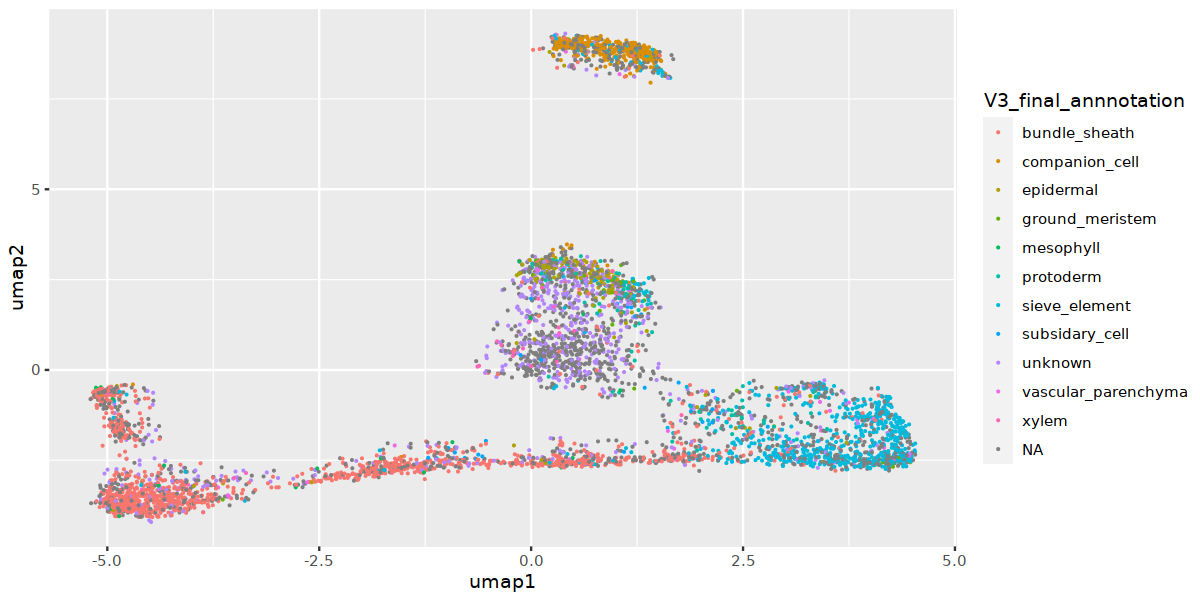

In [130]:
# Copmare with previous Annotation
options(repr.plot.width=10, repr.plot.height=5)
sb_annotation_v3 <- read_tsv("/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/sb_annot_v3/Sb_leaf.V3_final.txt") 
                                    
sb_annotation_v3.final <- sb_annotation_v3  %>% 
    dplyr::select(cellID, V3_final_annnotation)

final_combined <- left_join(sb.subcluster_vasculature.clean.clusters.final$sub_cluster_vasculature, sb_annotation_v3.final, by = "cellID")

ggplot(final_combined ,aes(umap1, umap2, color = V3_final_annnotation)) + 
    geom_jitter(size = .1)

In [134]:
write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Sb_leaf.merged_replicates.QC_V2.presto.txt",
                       col_names = TRUE, quote = "none", delim = "\t")

In [135]:
write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Sb_leaf.merged_replicates.QC_V2.presto.sub_cluster.vasculature.txt", 
            col_names = TRUE, quote = "none", delim = "\t")


## Write the output for marker visualization
prefix <- "Sb_leaf.merged_replicates.QC_V2.subclustering_vasculature"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/"

# output text files
nmf.meta <- sb.subcluster_vasculature.clean.clusters.final$sub_cluster_vasculature
nmf.rd <- sb.subcluster_vasculature.clean.clusters.final$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(sb.subcluster_vasculature.clean.clusters.final$counts))
trip$i <- rownames(sb.subcluster_vasculature.clean.clusters.final$counts)[trip$i]
trip$j <- colnames(sb.subcluster_vasculature.clean.clusters.final$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")

# Working on Epidermal Lineage

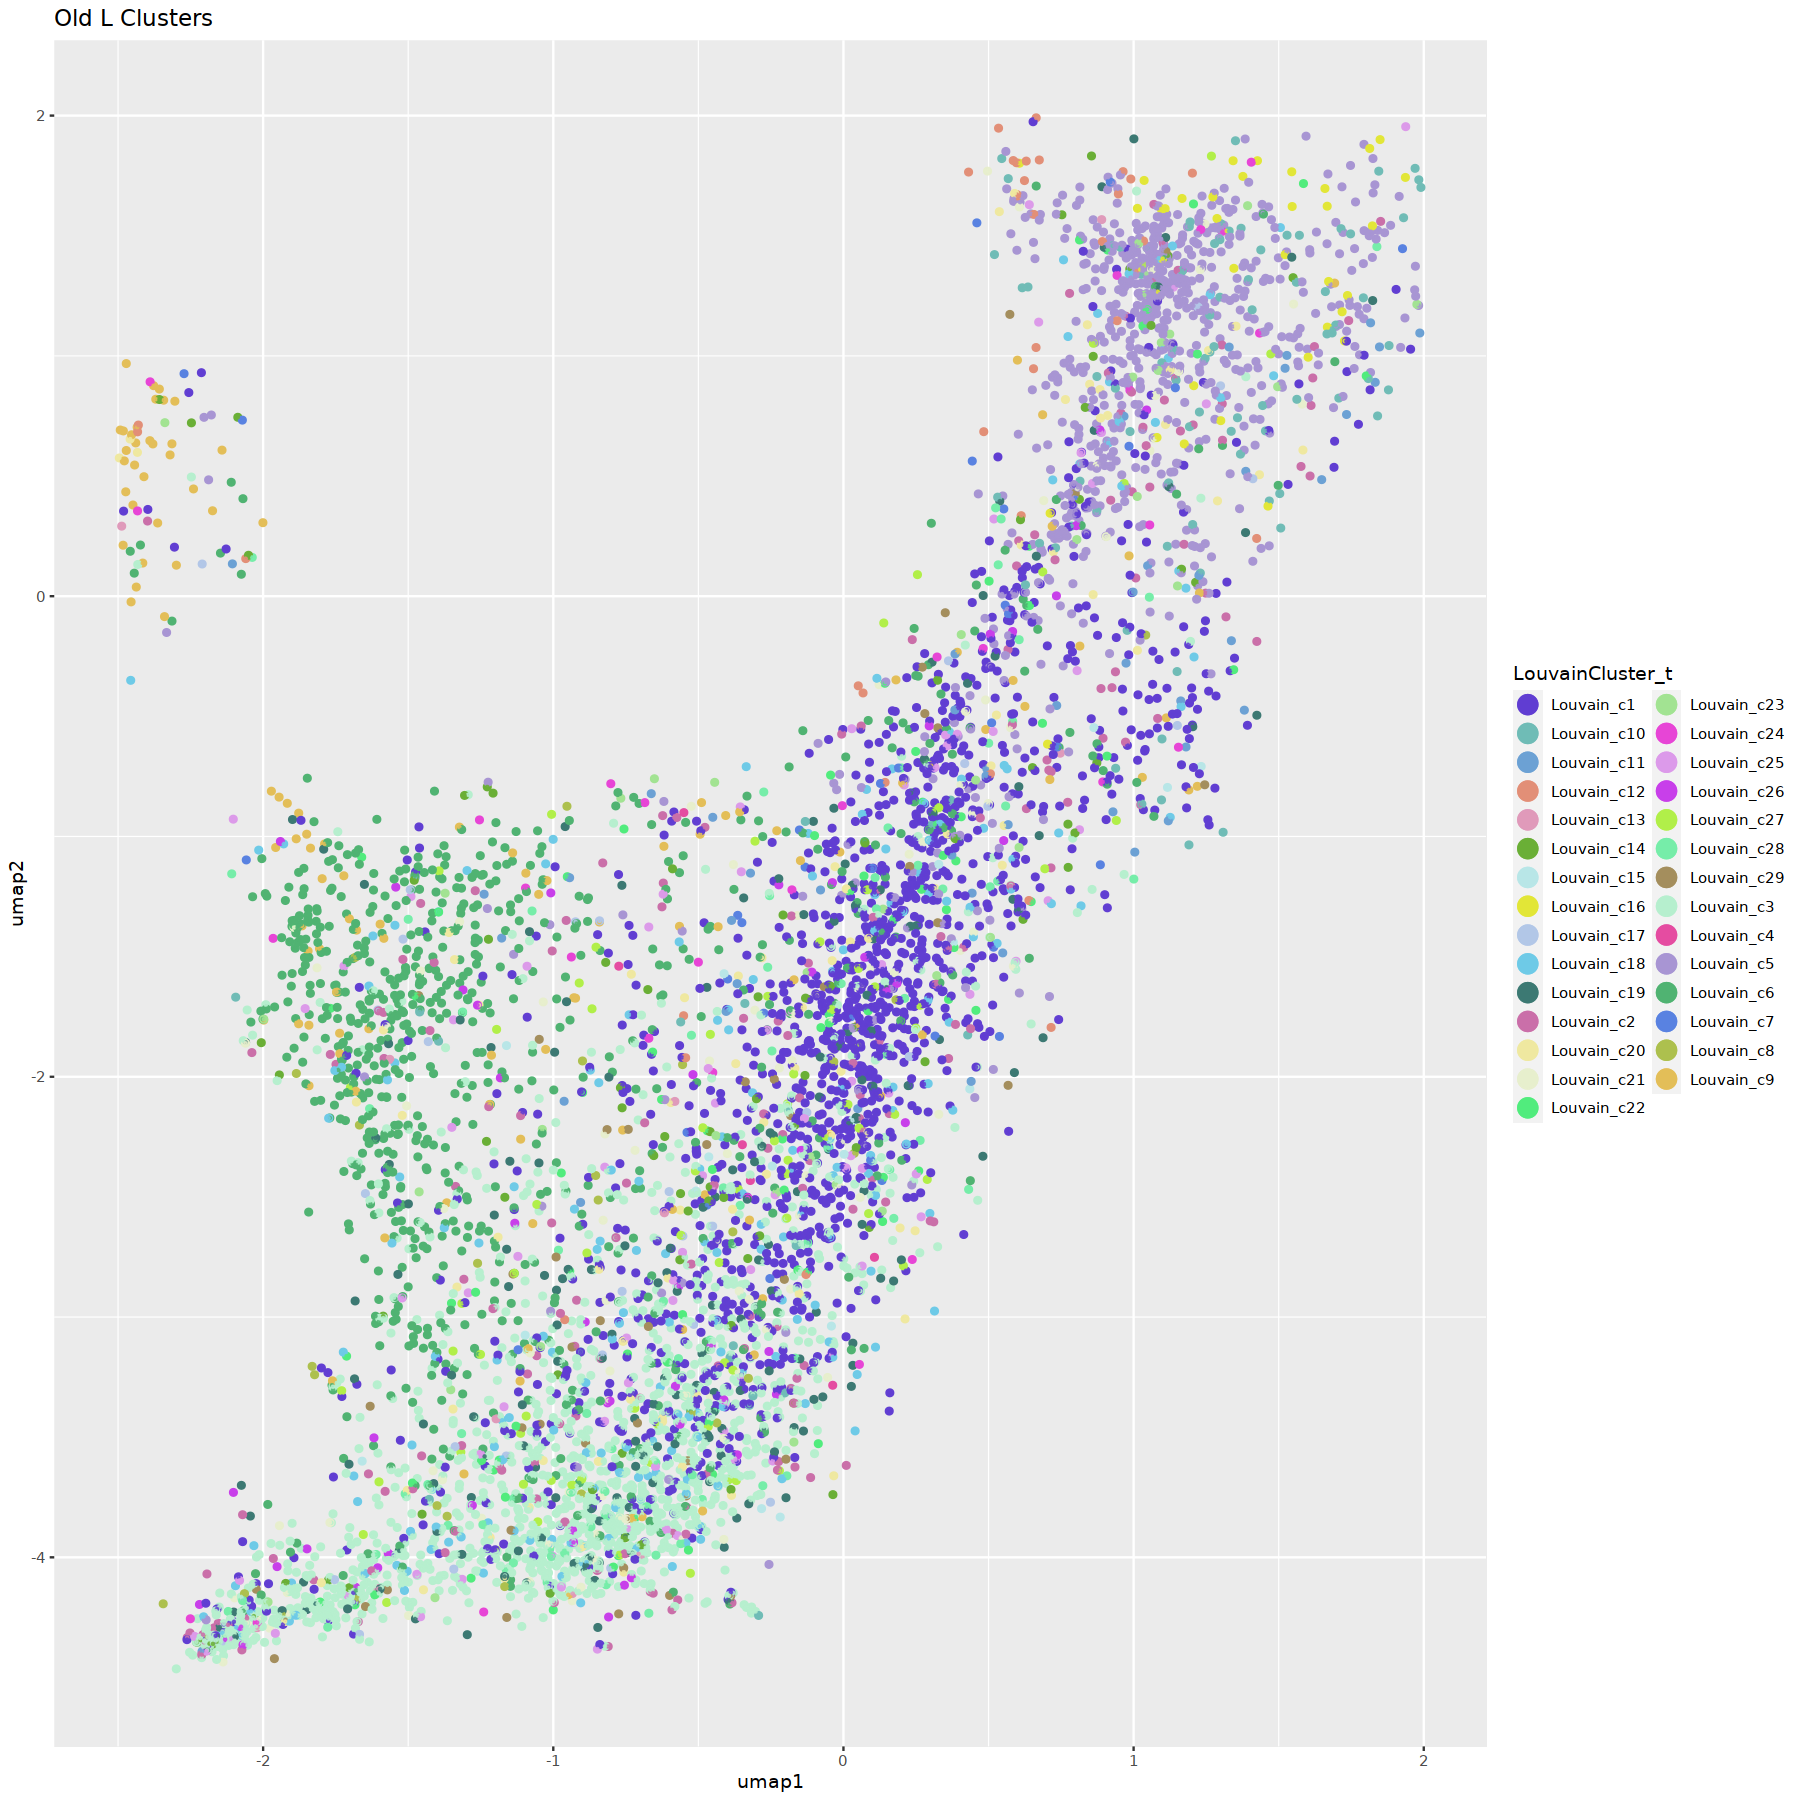

In [24]:
library(cowplot)
library(randomcoloR)
library(dplyr)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


sb.subcluster_epidermal <- Sb.subcluster

sb.subcluster_epidermal$meta <- loaded_socrates_data$cluster_acrs

clusters <- c("Louvain_c10","Louvain_c19","Louvain_c21","Louvain_c23","Louvain_c18","Louvain_c10",
  "Louvain_c28","Louvain_c2","Louvain_c23","Louvain_c11","Louvain_c24")

#c("LouvainC_18","LouvainC_5","LouvainC_7","LouvainC_32",
#  "LouvainC_24","LouvainC_21","LouvainC_8","LouvainC_20","LouvainC_23")

sb.subcluster_epidermal$meta  %>% 
    filter(umap1 > -2.5 & umap1 < 2 & umap2 < 2) %>% 
    ggplot(., aes(umap1, umap2, color = LouvainCluster_t)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

chosen_subcluster <- sb.subcluster_epidermal$meta %>% 
    filter(umap1 > -2.5 & umap1 < 2 & umap2 < 2)

In [25]:
meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
sb.subcluster_epidermal$meta <- meta_df
sb.subcluster_epidermal$meta.v3 <- meta_df

sb.subcluster_epidermal$acr <- read.table("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.Louvain_cluster.iter_1/Sb.V3_annot.500bp_peaks.bed")

sb.subcluster_epidermal <- generateMatrix(sb.subcluster_epidermal, 
                                              filtered=FALSE,
                                              peaks = TRUE,
                                            organelle_scaffolds= c("Pt", "Mt"),
                                            blacklist = "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/sb_prelim.final_blacklist.bed",
                                              verbose=TRUE)

sb.subcluster_epidermal <- convertSparseData(sb.subcluster_epidermal, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [29]:
# clean sparse counts matrix ---------------------------------------------
sb.subcluster_epidermal.clean <- cleanData(sb.subcluster_epidermal, 
                    min.c = 50,
                     min.t=0.05,  # minimum feature frequency across cells
                     max.t=0.3, # maximum feature frequency across cells
                     verbose=T)

   * Input: cells = 6097 | peaks = 69875

   * Filtered: cells = 5904 | peaks = 10535



In [49]:
?reduceDims

ℹ Rendering development documentation for "reduceDims"


 - non-linear dimensionality reduction with UMAP ...

10:58:26 UMAP embedding parameters a = 1.896 b = 0.8006

10:58:26 Read 5904 rows and found 49 numeric columns

10:58:26 Using Annoy for neighbor search, n_neighbors = 15

10:58:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:58:26 Writing NN index file to temp file /tmp/RtmpAWc5Ji/file8a531178d72b

10:58:26 Searching Annoy index using 16 threads, search_k = 1500

10:58:27 Annoy recall = 100%

10:58:30 Commencing smooth kNN distance calibration using 16 threads
 with target n_neighbors = 15

10:58:33 Initializing from normalized Laplacian + noise (using irlba)

10:58:33 Commencing optimization for 500 epochs, with 140258 positive edges

10:58:55 Optimization finished



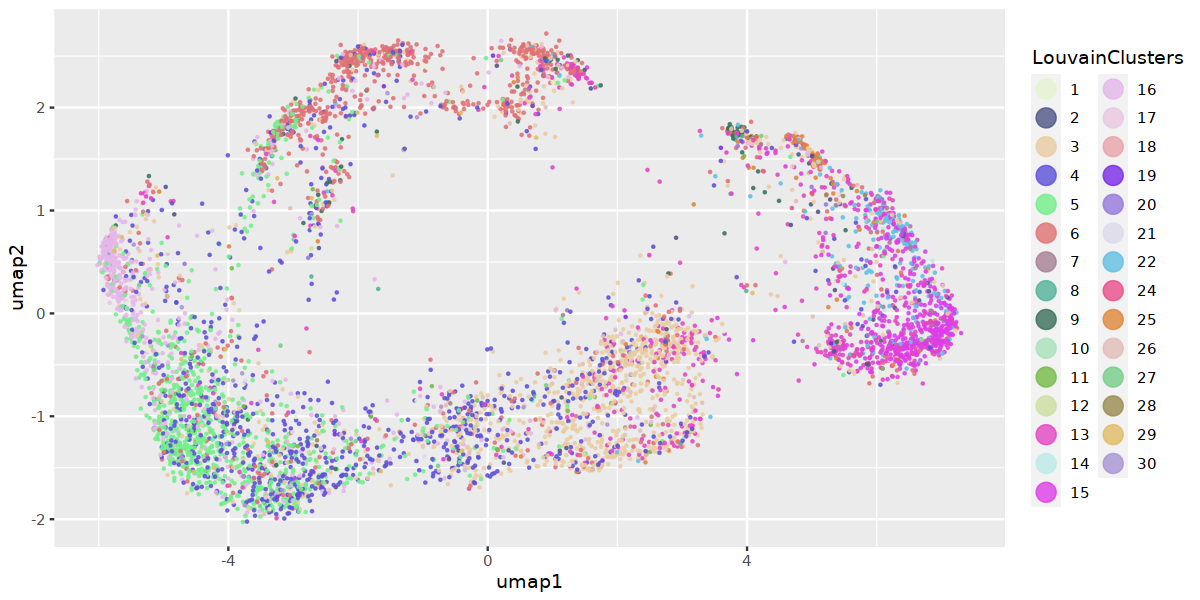

In [96]:
# normalize with TFIDF ---------------------------------------------------
sb.subcluster_epidermal.clean <- tfidf(sb.subcluster_epidermal.clean)

# project with NMF -------------------------------------------------------
sb.subcluster_epidermal.clean <- reduceDims(sb.subcluster_epidermal.clean,
                      method="SVD", 
                      n.pcs=50, 
                      cor.max= .6,
                      num.var=5000,
                      doL2=TRUE,
                      svd_slotName="SVD")

# reduce to 2-dimensions with UMAP ---------------------------------------
sb.subcluster_epidermal.clean <- projectUMAP(sb.subcluster_epidermal.clean, 
                       verbose=T,
                       k.near=15,
                       m.dist=0.01,
                       svd_slotName="SVD")

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

ggplot(sb.subcluster_epidermal.clean$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5788
Number of edges: 303698

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.7183
Number of communities: 13
Elapsed time: 5 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



LouvainClusters n()
1  1               665
2  2               637
3  3               626
4  4               566
5  5               533
6  6               450
7  7               401
8  8               386
9  9               374
10 10              374
11 11              365
12 12              272
13 13              139

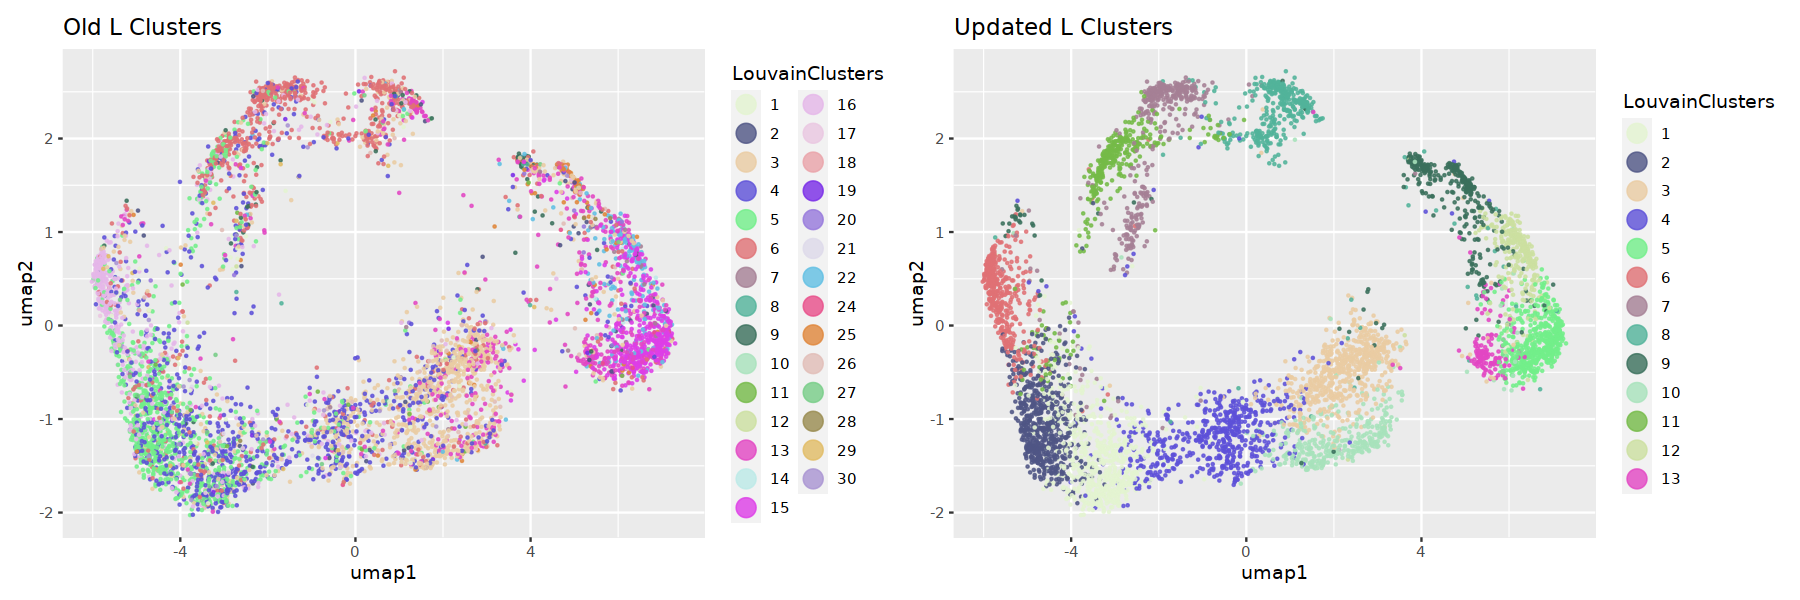

In [97]:
# identify clusters using neighborhood graph -----------------------------
sb.subcluster_epidermal.clean.clusters <- callClusters(sb.subcluster_epidermal.clean, 
                        res=1.5,
                        k.near = 15,
                        min.reads=500,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster_epidermal",
                        cleanCluster=FALSE)

options(repr.plot.width=15, repr.plot.height=5)
old_clusters <- ggplot(sb.subcluster_epidermal.clean.clusters$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(sb.subcluster_epidermal.clean.clusters$sub_cluster_epidermal, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

sb.subcluster_epidermal.clean.clusters$sub_cluster  %>% 
    group_by(LouvainClusters)  %>% 
    summarise(n())

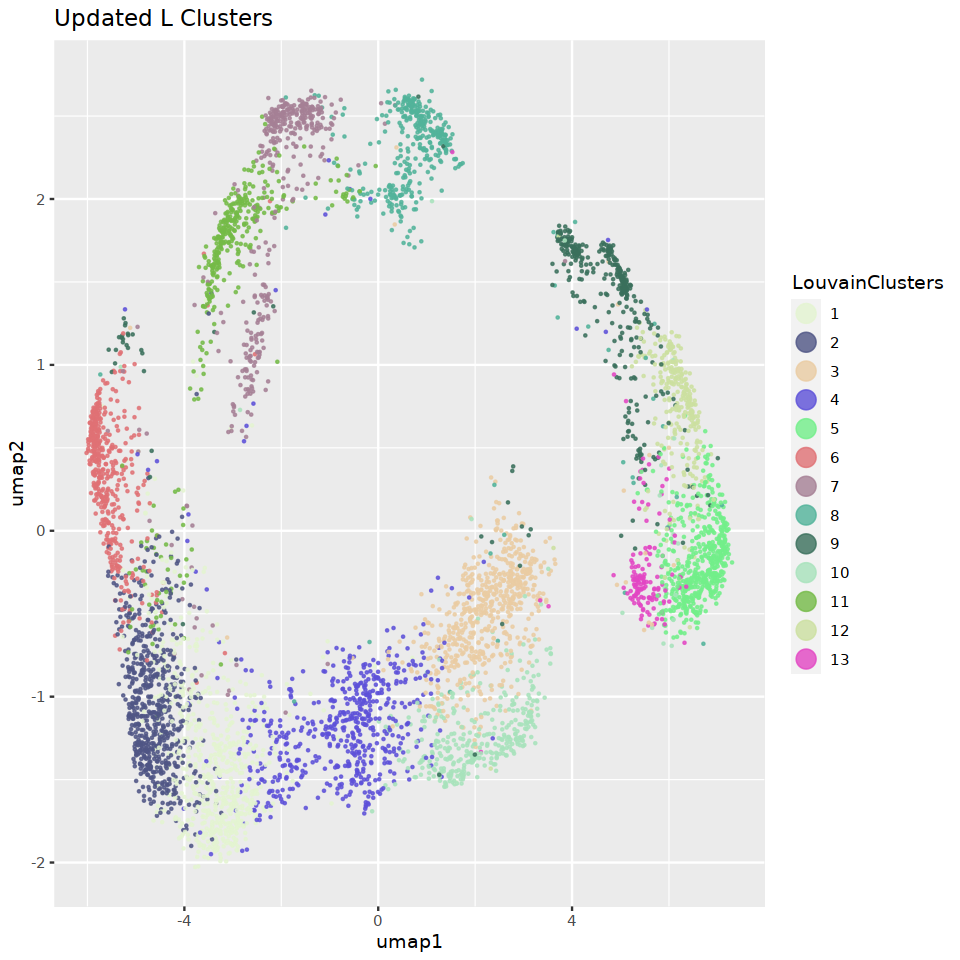

In [98]:
options(repr.plot.width=8, repr.plot.height=8)
new_clusters

In [99]:
setwd("/scratch/jpm73279/comparative_single_cell/dev_location")
sb.subcluster_epidermal.clean.clusters$all_genes <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.gene.bed"
#bed_intersections <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm.all_mergeed_repds.unique.mpq10.tn5.sorted.bed"
genome_file <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.mainGenome.MtPt.fasta.fai"

### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
sb.subcluster_epidermal.clean.clusters.counts <- sb.subcluster_epidermal.clean.clusters
sb.subcluster_epidermal.clean.clusters.counts$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output"



## Execute Annotation Attempt #1

library(presto)
sb.subcluster_epidermal.clean.clusters.final <- run_presto(sb.subcluster_epidermal.clean.clusters.counts,
           meta_slot = "sub_cluster_epidermal",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

grabbed_top_marker_per_cluster <- top_markers(sb.subcluster_epidermal.clean.clusters.final$presto_marker, 50, auc_min = .5, pct_in_min = 25)

# A tibble: 6 × 24
  cellID      total   tss  acrs  ptmt nSites log10…¹  pTSS  FRiP    pOrg   tss_z
  <chr>       <dbl> <dbl> <dbl> <dbl>  <dbl>   <dbl> <dbl> <dbl>   <dbl>   <dbl>
1 BC:Z:ACAGT… 85370 44652 46873   831  15714    4.20 0.523 0.549 0.00973  0.0591
2 BC:Z:ACAGT… 98582 56619 70591  2670  20064    4.30 0.574 0.716 0.0271   0.215 
3 BC:Z:ATCAC… 79949 38798 43668  1251  14973    4.18 0.485 0.546 0.0156  -0.0555
4 BC:Z:CGATG… 87016 50302 64786  1853  18419    4.27 0.578 0.745 0.0213   0.226 
5 BC:Z:GCCAA… 81969 48901 68121   529  18444    4.27 0.597 0.831 0.00645  0.282 
6 BC:Z:CGATG… 82497 52252 66749  3725  17751    4.25 0.633 0.809 0.0452   0.394 
# … with 13 more variables: acr_z <dbl>, sites_z <dbl>, qc_check <dbl>,
#   background <dbl>, cellbulk <dbl>, is_cell <dbl>, sampleID <chr>,
#   umap1 <dbl>, umap2 <dbl>, doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, LouvainCluster_t <chr>, and abbreviated variable
#   name ¹​log10nSites
# A tibble: 6 × 3
  gene_name

In [100]:
represented_marker_lst <- list()
for (i in unique(sb.subcluster_epidermal.clean.clusters.final$sub_cluster_epidermal$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_sb, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

$`2`
# A tibble: 1 × 8
   rank geneID           chr      start      end name  type      tissue         
  <int> <chr>            <chr>    <dbl>    <dbl> <chr> <chr>     <chr>          
1     3 Sobic.002G207900 Chr02 61233338 61239219 gl1   epidermis axillaryBud;le…

$`9`
# A tibble: 1 × 8
   rank geneID                chr      start      end name  type          tissue
  <int> <chr>                 <chr>    <dbl>    <dbl> <chr> <chr>         <chr> 
1     5 Sorbiv5.1_pg9159.m1.g Chr06 41574374 41588764 ba2   axillary_mer… axill…

$`12`
# A tibble: 1 × 8
   rank geneID           chr      start      end name  type    tissue          
  <int> <chr>            <chr>    <dbl>    <dbl> <chr> <chr>   <chr>           
1    38 Sobic.001G499200 Chr01 81035681 81040362 nod   stomata axillaryBud;leaf

$`3`
# A tibble: 2 × 8
   rank geneID                chr      start      end name          type  tissue
  <int> <chr>                 <chr>    <dbl>    <dbl> <chr>         <chr> <chr> 
1     7 Sorbiv5.1_pg9159.m1.g Chr06 41574374 41588764 ba2           axil… axill…
2    49 Sobic.002G343500      Chr02 72301461 72308725 ZmCPK37__ZmC… guar… axill…

$`4`
# A tibble: 1 × 8
   rank geneID           chr      start      end name  type      tissue         
  <int> <chr>            <chr>    <dbl>    <dbl> <chr> <chr>     <chr>          
1    50 Sobic.002G207900 Chr02 61233338 61239219 gl1   epidermis axillaryBud;le…

$`13`
# A tibble: 1 × 8
   rank geneID                chr      start      end name  type          tissue
  <int> <chr>                 <chr>    <dbl>    <dbl> <chr> <chr>         <chr> 
1    47 Sorbiv5.1_pg9159.m1.g Chr06 41574374 41588764 ba2   axillary_mer… axill…

$`10`
# A tibble: 1 × 8
   rank geneID                       chr      start      end name   type  tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr>  <chr> <chr> 
1    35 Sorbiv5.1_pg26824.valid.m2.g Chr02 72794498 72798197 Zm000… prot… leaf  

$`11`
# A tibble: 1 × 8
   rank geneID                 chr     start     end name           type  tissue
  <int> <chr>                  <chr>   <dbl>   <dbl> <chr>          <chr> <chr> 
1    50 Sorbiv5.1_pg15531.m1.g Chr03 3341071 3347117 me3_ortho_cou… bund… axill…

$`8`
# A tibble: 2 × 8
   rank geneID           chr      start      end name               type  tissue
  <int> <chr>            <chr>    <dbl>    <dbl> <chr>              <chr> <chr> 
1    10 Sobic.001G075101 Chr01  5763796  5774227 knox8              SAM,… axill…
2    28 Sobic.001G160200 Chr01 13278291 13284429 Zm00001eb050930_p… prot… leaf  

$`5`
# A tibble: 1 × 8
   rank geneID           chr      start      end name  type               tissue
  <int> <chr>            <chr>    <dbl>    <dbl> <chr> <chr>              <chr> 
1    45 Sobic.001G221900 Chr01 21229983 21235639 ad1   protoderm,L1_SAM,… axill…

$`7`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>, type <chr>, tissue <chr>

$`1`
# A tibble: 2 × 8
   rank geneID                      chr      start      end name    type  tissue
  <int> <chr>                       <chr>    <dbl>    <dbl> <chr>   <chr> <chr> 
1    18 Sobic.002G207900            Chr02 61233338 61239219 gl1     epid… axill…
2    30 Sorbiv5.1_pg1301.valid.m1.g Chr01 76380925 76385283 Zm0000… epid… leaf  

$`6`
# A tibble: 1 × 8
   rank geneID                 chr     start     end name           type  tissue
  <int> <chr>                  <chr>   <dbl>   <dbl> <chr>          <chr> <chr> 
1    23 Sorbiv5.1_pg15531.m1.g Chr03 3341071 3347117 me3_ortho_cou… bund… axill…

Rows: 14947 Columns: 25
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (13): cellID, sampleID, d.type, cell_annotation_glmnet, cell_annotation_...
dbl (12): total, tss, acrs, ptmt, nSites, log10nSites, umap1, umap2, doublet...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


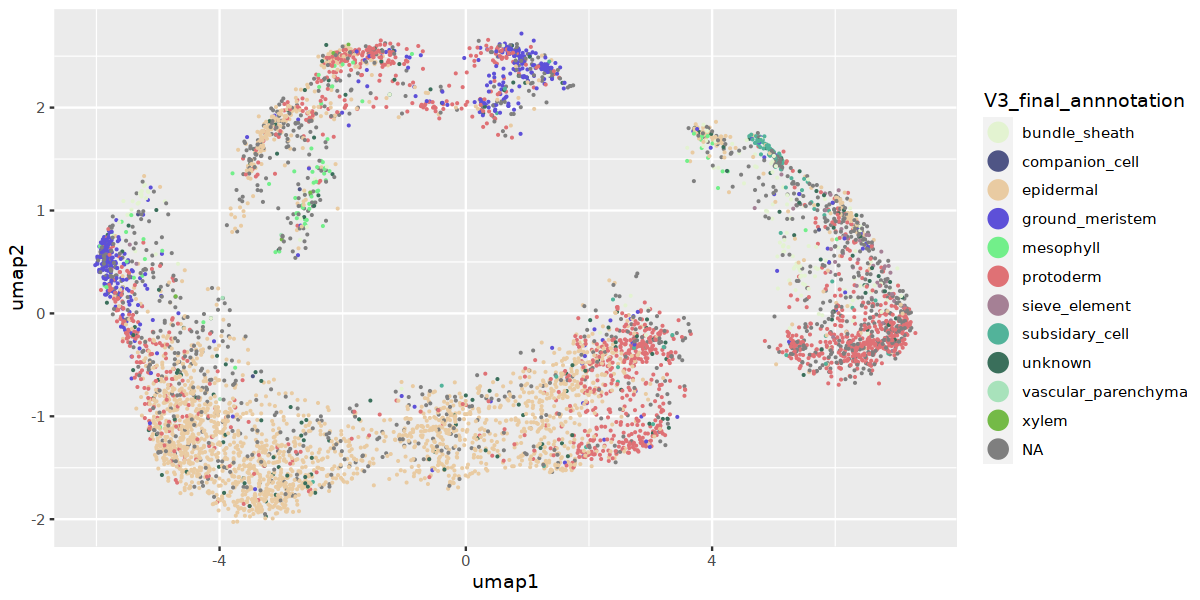

In [101]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)

# Copmare with previous Annotation
options(repr.plot.width=10, repr.plot.height=5)
sb_annotation_v3 <- read_tsv("/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/sb_annot_v3/Sb_leaf.V3_final.txt") 
                                    
sb_annotation_v3.final <- sb_annotation_v3  %>% 
    dplyr::select(cellID, V3_final_annnotation)

final_combined <- left_join(sb.subcluster_epidermal.clean.clusters.final$sub_cluster_epidermal, sb_annotation_v3.final, by = "cellID")

ggplot(final_combined ,aes(umap1, umap2, color = V3_final_annnotation)) + 
    geom_jitter(size = .1) +scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) 

In [102]:
head(sb.subcluster_epidermal.clean.clusters.final$sub_cluster_epidermal)

cellID                                                    
BC:Z:ACAGTGGGCTACCTAAGGTGAAAACTA-Sorghum_leaf.sciATAC_rep1 BC:Z:ACAGTGGGCTACCTAAGGTGAAAACTA-Sorghum_leaf.sciATAC_rep1
BC:Z:ACAGTGCTTGTACTAAGCGTACGACTA-Sorghum_leaf.sciATAC_rep1 BC:Z:ACAGTGCTTGTACTAAGCGTACGACTA-Sorghum_leaf.sciATAC_rep1
BC:Z:ATCACGCTTGTAAAACAATGAGCTCGG-Sorghum_leaf.sciATAC_rep1 BC:Z:ATCACGCTTGTAAAACAATGAGCTCGG-Sorghum_leaf.sciATAC_rep1
BC:Z:CGATGTGGCTACATACGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 BC:Z:CGATGTGGCTACATACGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1
BC:Z:GCCAATAGTTCCCTAAGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 BC:Z:GCCAATAGTTCCCTAAGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1
BC:Z:CGATGTATGTCAATACGGTCCGCTCGG-Sorghum_leaf.sciATAC_rep1 BC:Z:CGATGTATGTCAATACGGTCCGCTCGG-Sorghum_leaf.sciATAC_rep1
                                                           total tss   acrs 
BC:Z:ACAGTGGGCTACCTAAGGTGAAAACTA-Sorghum_leaf.sciATAC_rep1 85370 44652 46873
BC:Z:ACAGTGCTTGTACTAAGCGTACGACTA-Sorghum_leaf.sciATAC_rep1 98582 56619 70591
BC:Z:ATCACGCTTGTAAAACAATGAGCTCGG-Sorghum_leaf.sciATAC_rep1 79949 38798 43668
BC:Z:CGATGTGGCTACATACGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 87016 50302 64786
BC:Z:GCCAATAGTTCCCTAAGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 81969 48901 68121
BC:Z:CGATGTATGTCAATACGGTCCGCTCGG-Sorghum_leaf.sciATAC_rep1 82497 52252 66749
                                                           ptmt nSites
BC:Z:ACAGTGGGCTACCTAAGGTGAAAACTA-Sorghum_leaf.sciATAC_rep1  831 15714 
BC:Z:ACAGTGCTTGTACTAAGCGTACGACTA-Sorghum_leaf.sciATAC_rep1 2670 20064 
BC:Z:ATCACGCTTGTAAAACAATGAGCTCGG-Sorghum_leaf.sciATAC_rep1 1251 14973 
BC:Z:CGATGTGGCTACATACGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 1853 18419 
BC:Z:GCCAATAGTTCCCTAAGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1  529 18444 
BC:Z:CGATGTATGTCAATACGGTCCGCTCGG-Sorghum_leaf.sciATAC_rep1 3725 17751 
                                                           log10nSites
BC:Z:ACAGTGGGCTACCTAAGGTGAAAACTA-Sorghum_leaf.sciATAC_rep1 4.196287   
BC:Z:ACAGTGCTTGTACTAAGCGTACGACTA-Sorghum_leaf.sciATAC_rep1 4.302418   
BC:Z:ATCACGCTTGTAAAACAATGAGCTCGG-Sorghum_leaf.sciATAC_rep1 4.175309   
BC:Z:CGATGTGGCTACATACGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 4.265266   
BC:Z:GCCAATAGTTCCCTAAGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 4.265855   
BC:Z:CGATGTATGTCAATACGGTCCGCTCGG-Sorghum_leaf.sciATAC_rep1 4.249223   
                                                           pTSS      FRiP     
BC:Z:ACAGTGGGCTACCTAAGGTGAAAACTA-Sorghum_leaf.sciATAC_rep1 0.5230409 0.5490570
BC:Z:ACAGTGCTTGTACTAAGCGTACGACTA-Sorghum_leaf.sciATAC_rep1 0.5743341 0.7160638
BC:Z:ATCACGCTTGTAAAACAATGAGCTCGG-Sorghum_leaf.sciATAC_rep1 0.4852844 0.5461982
BC:Z:CGATGTGGCTACATACGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 0.5780776 0.7445297
BC:Z:GCCAATAGTTCCCTAAGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 0.5965792 0.8310581
BC:Z:CGATGTATGTCAATACGGTCCGCTCGG-Sorghum_leaf.sciATAC_rep1 0.6333806 0.8091082
                                                           pOrg        ⋯
BC:Z:ACAGTGGGCTACCTAAGGTGAAAACTA-Sorghum_leaf.sciATAC_rep1 0.009734099 ⋯
BC:Z:ACAGTGCTTGTACTAAGCGTACGACTA-Sorghum_leaf.sciATAC_rep1 0.027084052 ⋯
BC:Z:ATCACGCTTGTAAAACAATGAGCTCGG-Sorghum_leaf.sciATAC_rep1 0.015647475 ⋯
BC:Z:CGATGTGGCTACATACGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 0.021294934 ⋯
BC:Z:GCCAATAGTTCCCTAAGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 0.006453659 ⋯
BC:Z:CGATGTATGTCAATACGGTCCGCTCGG-Sorghum_leaf.sciATAC_rep1 0.045153157 ⋯
                                                           background cellbulk 
BC:Z:ACAGTGGGCTACCTAAGGTGAAAACTA-Sorghum_leaf.sciATAC_rep1 0.05727195 0.2451157
BC:Z:ACAGTGCTTGTACTAAGCGTACGACTA-Sorghum_leaf.sciATAC_rep1 0.05778739 0.2328546
BC:Z:ATCACGCTTGTAAAACAATGAGCTCGG-Sorghum_leaf.sciATAC_rep1 0.06389683 0.2245005
BC:Z:CGATGTGGCTACATACGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 0.06464999 0.2843590
BC:Z:GCCAATAGTTCCCTAAGGTTTCGTCGG-Sorghum_leaf.sciATAC_rep1 0.06316428 0.2804515
BC:Z:CGATGTATGTCAATACGGTCCGCTCGG-Sorghum_leaf.sciATAC_rep1 0.05315320 0.3065021
                                                           is_cell sampleID


In [107]:
colnames(sb.subcluster_epidermal.clean.clusters.final$sub_cluster_epidermal)

[1] "cellID"           "total"            "tss"              "acrs"            
 [5] "ptmt"             "nSites"           "log10nSites"      "pTSS"            
 [9] "FRiP"             "pOrg"             "tss_z"            "acr_z"           
[13] "sites_z"          "qc_check"         "background"       "cellbulk"        
[17] "is_cell"          "sampleID"         "umap1"            "umap2"           
[21] "doubletscore"     "d.type"           "LouvainClusters"  "LouvainCluster_t"

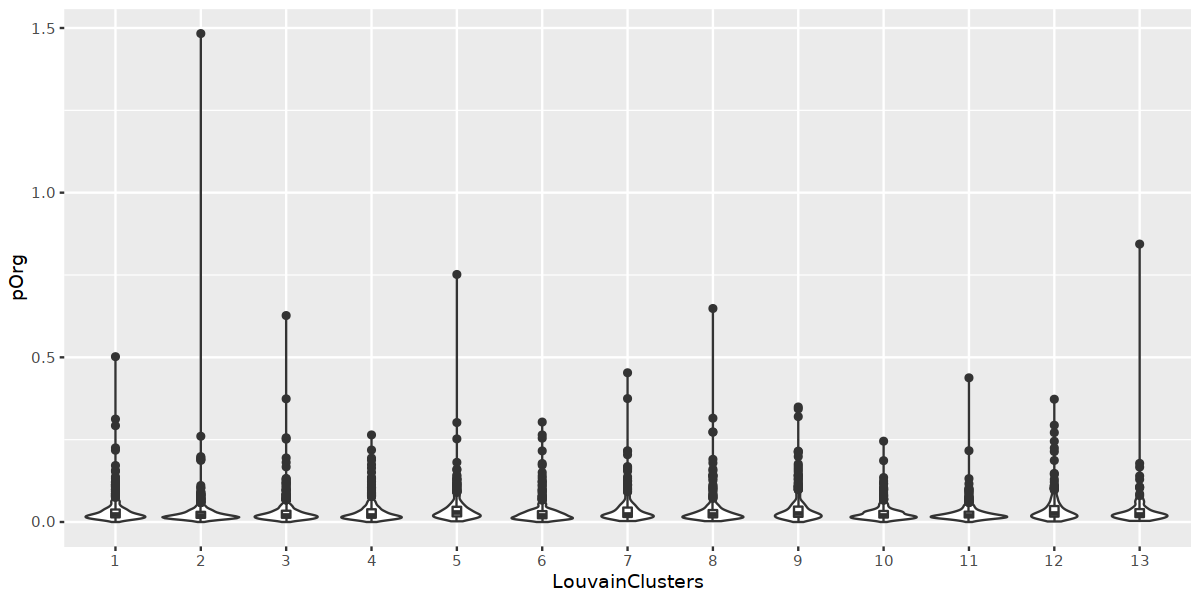

In [106]:
ggplot(sb.subcluster_epidermal.clean.clusters.final$sub_cluster_epidermal, aes(x = LouvainClusters, y = pOrg)) + 
       geom_violin() + geom_boxplot(width = .1)

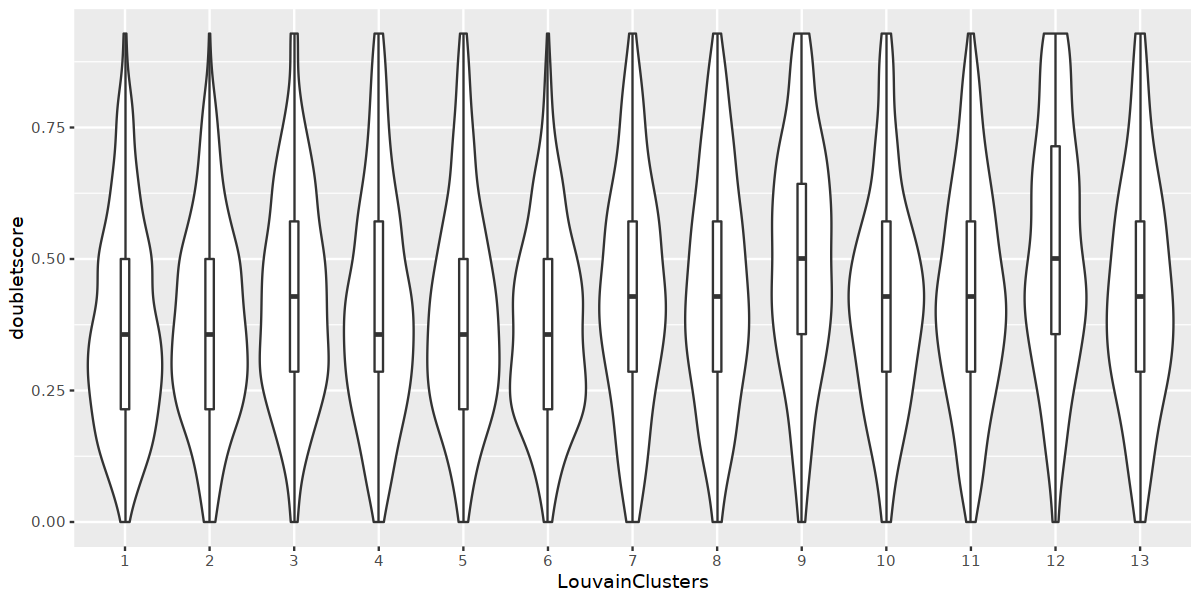

In [111]:
ggplot(sb.subcluster_epidermal.clean.clusters.final$sub_cluster_epidermal, aes(x = LouvainClusters, y = doubletscore)) + 
       geom_violin() + geom_boxplot(width = .1)

In [ ]:
ggplot(sb.subcluster_epidermal.clean.clusters.final$sub_cluster_epidermal, aes(x = LouvainClusters, y = nSites)) + 
       geom_violin() + geom_boxplot(width = .1)

Warning message:
"Removed 13 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 13 rows containing non-finite values (stat_boxplot)."


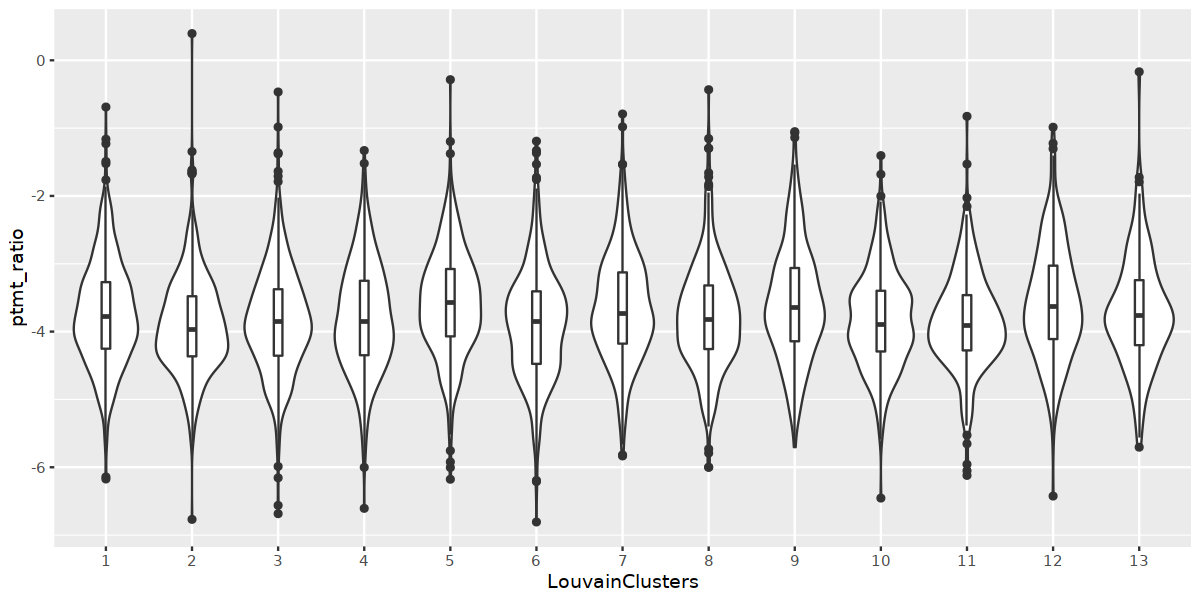

In [110]:
sb.subcluster_epidermal.clean.clusters.final$sub_cluster_epidermal  %>% 
    mutate(ptmt_ratio = log(ptmt/total))  %>% 
    ggplot(., aes(x = LouvainClusters, y = ptmt_ratio)) + 
       geom_violin() + geom_boxplot(width = .1)

In [113]:
write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Sb_leaf.merged_replicates.QC_V2.presto.sub_cluster.epidermal.txt", 
            col_names = TRUE, quote = "none", delim = "\t")


## Write the output for marker visualization
prefix <- "Sb_leaf.merged_replicates.QC_V2.subclustering_epidermal"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/"

# output text files
nmf.meta <- sb.subcluster_epidermal.clean.clusters.final$sub_cluster_epidermal
nmf.rd <- sb.subcluster_epidermal.clean.clusters.final$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(sb.subcluster_epidermal.clean.clusters.final$counts))
trip$i <- rownames(sb.subcluster_epidermal.clean.clusters.final$counts)[trip$i]
trip$j <- colnames(sb.subcluster_epidermal.clean.clusters.final$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")

# Subclustering Vascular Parenchyma - Companion Cells

In [115]:
colnames(loaded_socrates_data$cluster_acrs)

[1] "cellID"           "total"            "tss"              "acrs"            
 [5] "ptmt"             "nSites"           "log10nSites"      "pTSS"            
 [9] "FRiP"             "pOrg"             "tss_z"            "acr_z"           
[13] "sites_z"          "qc_check"         "background"       "cellbulk"        
[17] "is_cell"          "sampleID"         "umap1"            "umap2"           
[21] "doubletscore"     "d.type"           "LouvainClusters"  "LouvainCluster_t"

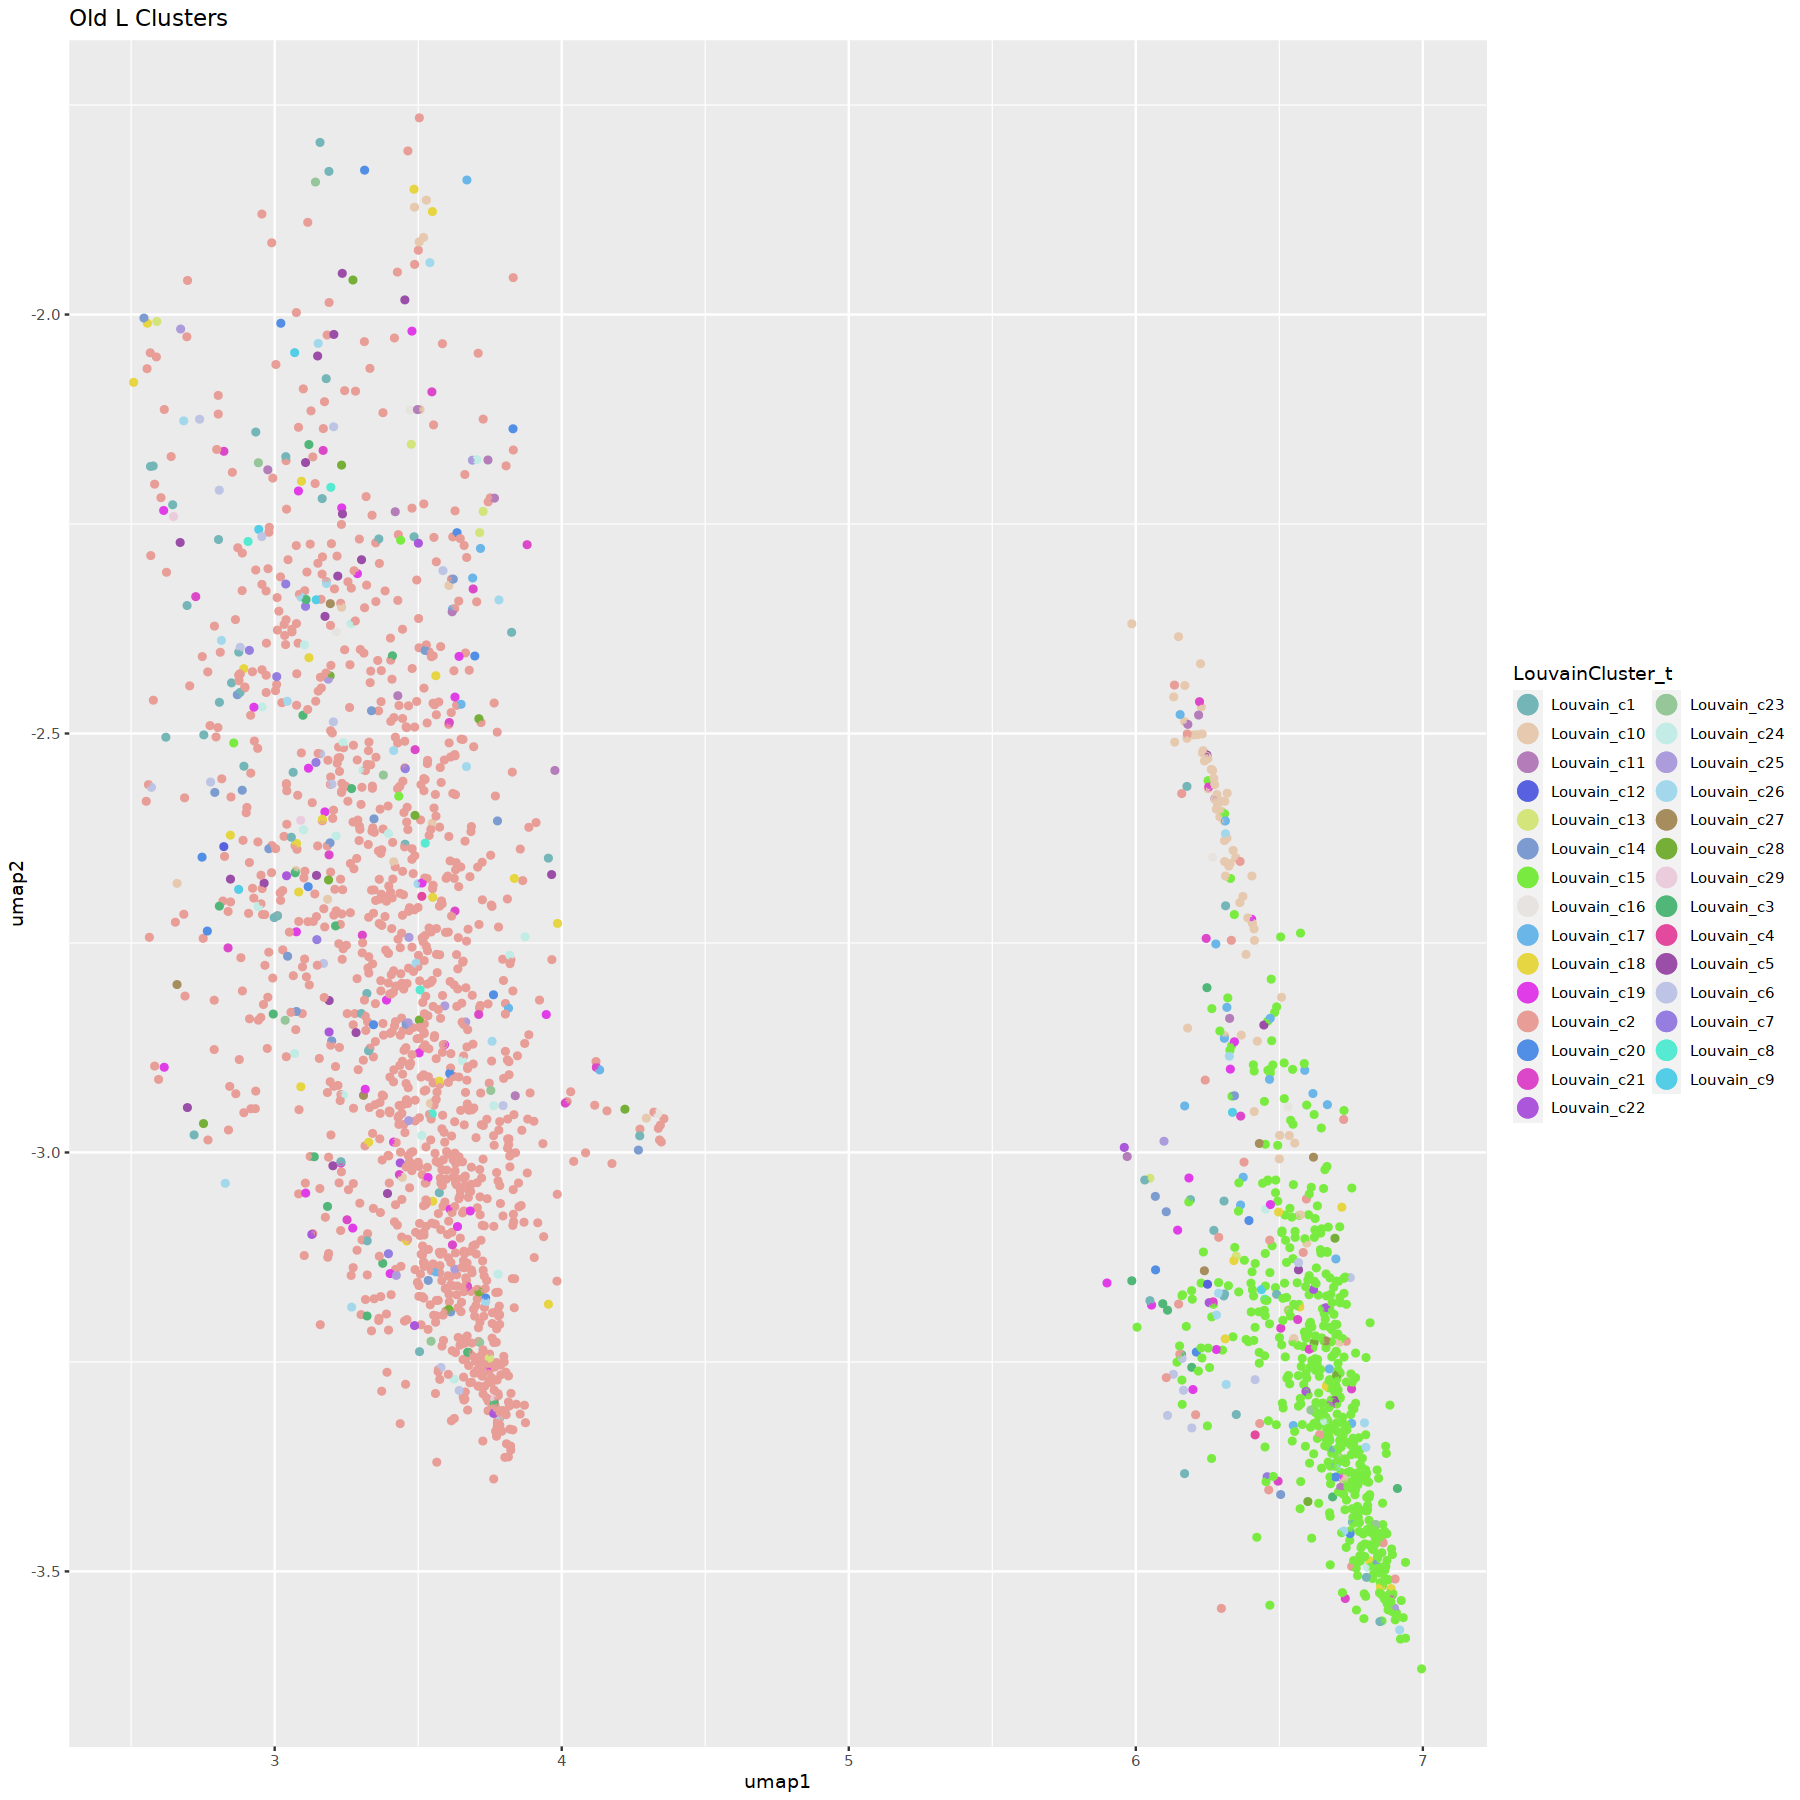

In [142]:
library(cowplot)
library(randomcoloR)
library(dplyr)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


sb.subcluster_CC_SE <- Sb.subcluster

sb.subcluster_CC_SE$meta <- loaded_socrates_data$cluster_acrs

clusters <- c("Louvain_c15")

#c("LouvainC_18","LouvainC_5","LouvainC_7","LouvainC_32",
#  "LouvainC_24","LouvainC_21","LouvainC_8","LouvainC_20","LouvainC_23")

sb.subcluster_CC_SE$meta  %>% 
    filter(umap1 > 2.5 & umap2 < -1)  %>% 
    ggplot(., aes(umap1, umap2, color = LouvainCluster_t)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

chosen_subcluster <- sb.subcluster_CC_SE$meta %>% 
    filter(umap1 > 2.5 & umap2 < -1)

In [143]:
meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
sb.subcluster_CC_SE$meta <- meta_df
sb.subcluster_CC_SE$meta.v3 <- meta_df

sb.subcluster_CC_SE$acr <- read.table("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.Louvain_cluster.iter_1/Sb.V3_annot.500bp_peaks.bed")

sb.subcluster_CC_SE <- generateMatrix(sb.subcluster_CC_SE, 
                                              filtered=FALSE,
                                              peaks = TRUE,
                                            organelle_scaffolds= c("Pt", "Mt"),
                                            blacklist = "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/sb_prelim.final_blacklist.bed",
                                              verbose=TRUE)

sb.subcluster_CC_SE <- convertSparseData(sb.subcluster_CC_SE, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [155]:
# clean sparse counts matrix ---------------------------------------------
sb.subcluster_CC_SE.clean <- cleanData(sb.subcluster_CC_SE, 
                     min.c = 25,
                     min.t=0.01,  # minimum feature frequency across cells
                     max.t=0.2, # maximum feature frequency across cells
                     verbose=T)

   * Input: cells = 2153 | peaks = 69875

   * Filtered: cells = 2153 | peaks = 23056



In [158]:
?projectUMAP

ℹ Rendering development documentation for "projectUMAP"


 - non-linear dimensionality reduction with UMAP ...

12:05:36 UMAP embedding parameters a = 1.914 b = 0.7956

12:05:36 Read 2153 rows and found 49 numeric columns

12:05:36 Using Annoy for neighbor search, n_neighbors = 25

12:05:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:05:36 Writing NN index file to temp file /tmp/RtmpAWc5Ji/file8a5366d27a38

12:05:36 Searching Annoy index using 16 threads, search_k = 2500

12:05:36 Annoy recall = 100%

12:05:38 Commencing smooth kNN distance calibration using 16 threads
 with target n_neighbors = 25

12:05:41 Initializing from normalized Laplacian + noise (using irlba)

12:05:41 Commencing optimization for 500 epochs, with 65600 positive edges

12:05:51 Optimization finished



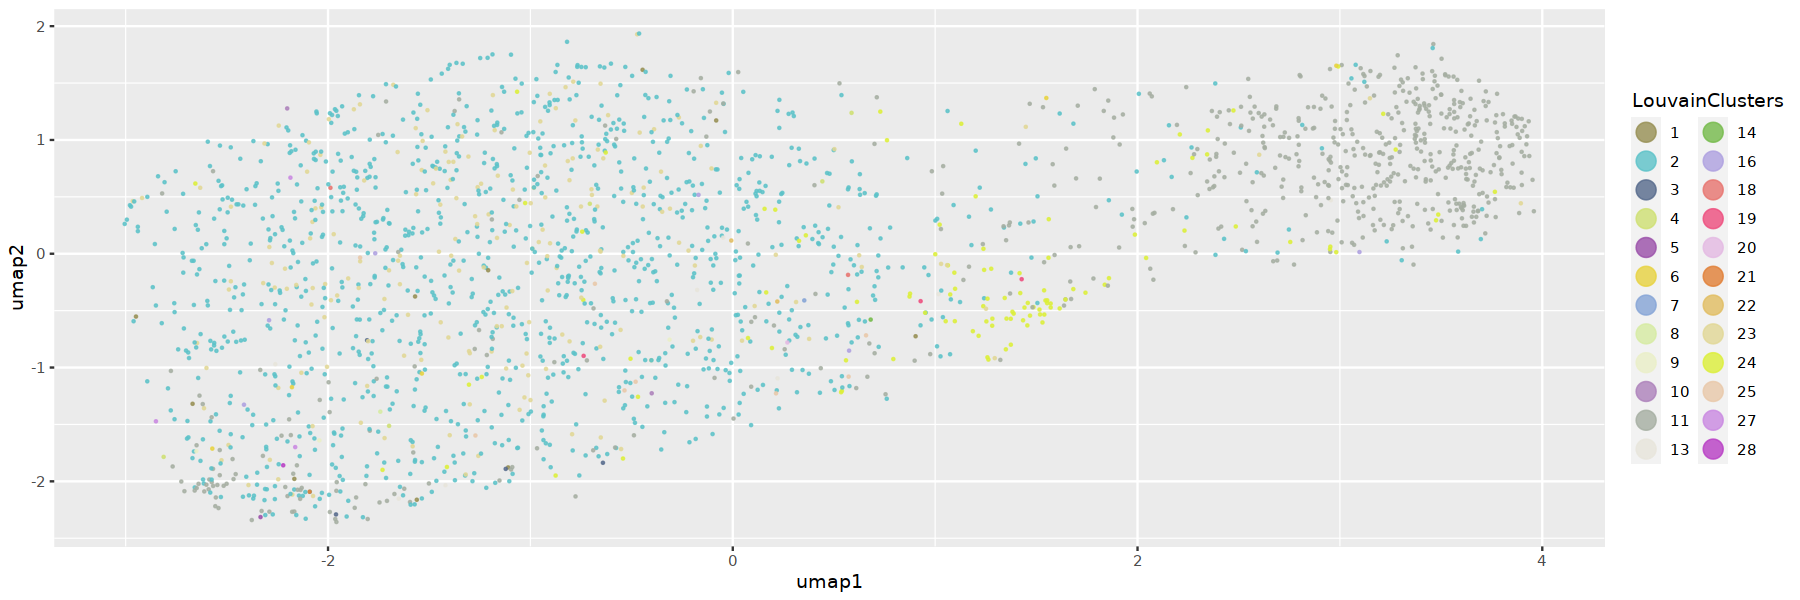

In [162]:
# normalize with TFIDF ---------------------------------------------------
sb.subcluster_CC_SE.clean <- tfidf(sb.subcluster_CC_SE.clean)

# project with NMF -------------------------------------------------------
sb.subcluster_CC_SE.clean <- reduceDims(sb.subcluster_CC_SE.clean,
                      method="SVD", 
                      n.pcs=50, 
                      cor.max= .6,
                      num.var=5000,
                      doL2=TRUE,
                      svd_slotName="SVD")

# reduce to 2-dimensions with UMAP ---------------------------------------
sb.subcluster_CC_SE.clean <- projectUMAP(sb.subcluster_CC_SE.clean, 
                       verbose=T,
                       k.near=25,
                       m.dist=.005,
                       svd_slotName="SVD")

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

ggplot(sb.subcluster_CC_SE.clean$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2118
Number of edges: 53818

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.3960
Number of communities: 6
Elapsed time: 2 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



LouvainClusters n() 
1 1               1093
2 2                323
3 3                206
4 4                204
5 5                192
6 6                100

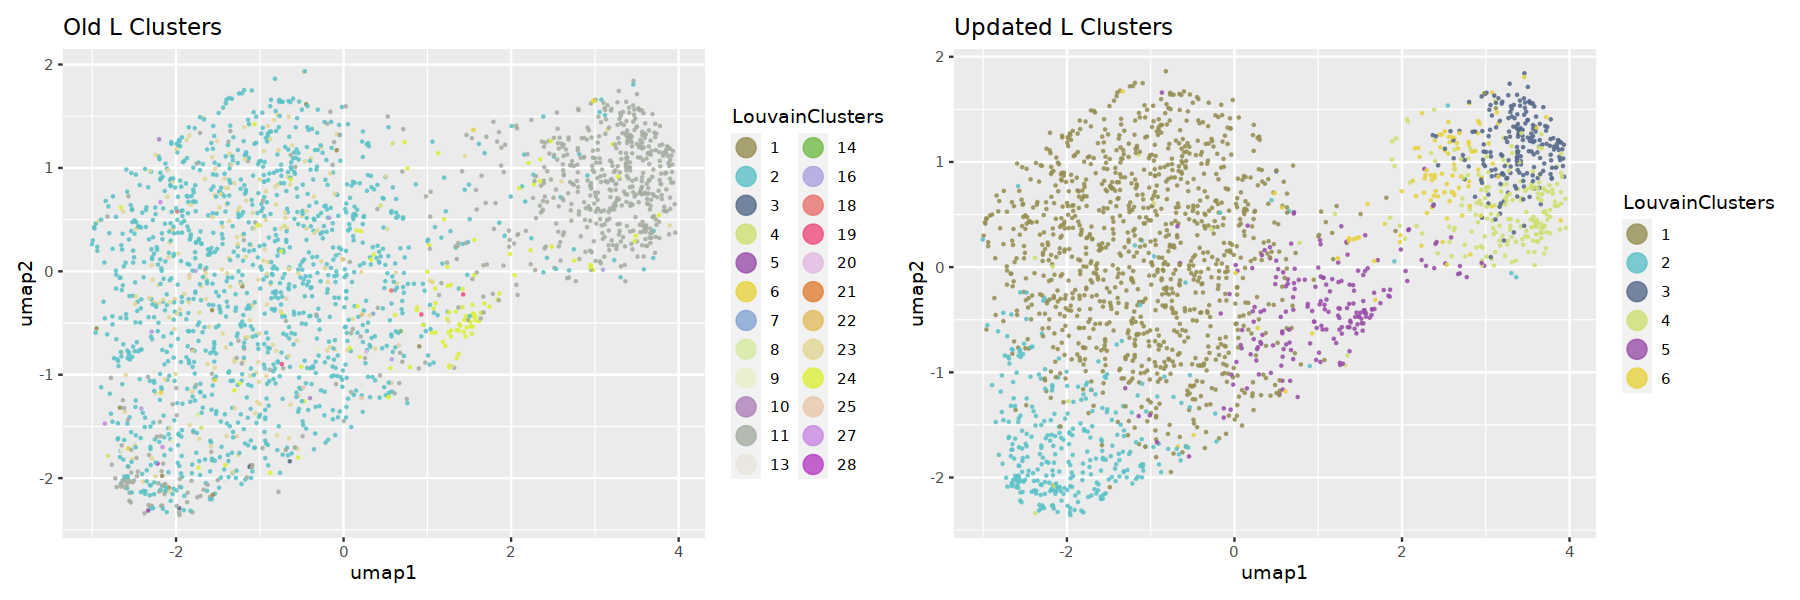

In [168]:
# identify clusters using neighborhood graph -----------------------------
sb.subcluster_CC_SE.clean.clusters <- callClusters(sb.subcluster_CC_SE.clean, 
                        res=1.5,
                        k.near = 15,
                        min.reads=200,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster_CC_SE",
                        cleanCluster=FALSE)

options(repr.plot.width=15, repr.plot.height=5)
old_clusters <- ggplot(sb.subcluster_CC_SE.clean.clusters$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(sb.subcluster_CC_SE.clean.clusters$sub_cluster_CC_SE, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

sb.subcluster_CC_SE.clean.clusters$sub_cluster  %>% 
    group_by(LouvainClusters)  %>% 
    summarise(n())

In [169]:
setwd("/scratch/jpm73279/comparative_single_cell/dev_location")
sb.subcluster_CC_SE.clean.clusters$all_genes <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.gene.bed"
#bed_intersections <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm.all_mergeed_repds.unique.mpq10.tn5.sorted.bed"
genome_file <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.mainGenome.MtPt.fasta.fai"

### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
sb.subcluster_CC_SE.clean.clusters.counts <- sb.subcluster_CC_SE.clean.clusters
sb.subcluster_CC_SE.clean.clusters.counts$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output"



## Execute Annotation Attempt #1

library(presto)
sb.subcluster_CC_SE.clean.clusters.final <- run_presto(sb.subcluster_CC_SE.clean.clusters.counts,
           meta_slot = "sub_cluster_CC_SE",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

grabbed_top_marker_per_cluster <- top_markers(sb.subcluster_CC_SE.clean.clusters.final$presto_marker, 100, auc_min = .5, pct_in_min = 25)

represented_marker_lst <- list()
for (i in unique(sb.subcluster_CC_SE.clean.clusters.final$sub_cluster_CC_SE$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_sb, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

# A tibble: 6 × 24
  cellID      total   tss  acrs  ptmt nSites log10…¹  pTSS   FRiP    pOrg  tss_z
  <chr>       <dbl> <dbl> <dbl> <dbl>  <dbl>   <dbl> <dbl>  <dbl>   <dbl>  <dbl>
1 BC:Z:ATCA… 158695 40497 15532   710   9908    4.00 0.255 0.0979 0.00447 -0.754
2 BC:Z:CGAT… 159913 50096 29062  1554  13821    4.14 0.313 0.182  0.00972 -0.577
3 BC:Z:TTAG… 109649 27618 11343   318   7334    3.87 0.252 0.103  0.00290 -0.764
4 BC:Z:TGAC…  84033 20453  6146  8047   4905    3.69 0.243 0.0731 0.0958  -0.789
5 BC:Z:TGAC…  77779 21626  6580   584   4784    3.68 0.278 0.0846 0.00751 -0.684
6 BC:Z:ACAG…  76969 29710 25272   717  10883    4.04 0.386 0.328  0.00932 -0.357
# … with 13 more variables: acr_z <dbl>, sites_z <dbl>, qc_check <dbl>,
#   background <dbl>, cellbulk <dbl>, is_cell <dbl>, sampleID <chr>,
#   umap1 <dbl>, umap2 <dbl>, doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, LouvainCluster_t <chr>, and abbreviated variable
#   name ¹​log10nSites
# A tibble: 6 × 3
  gene_name

$`1`
# A tibble: 1 × 8
   rank geneID           chr     start     end name                 type  tissue
  <int> <chr>            <chr>   <dbl>   <dbl> <chr>                <chr> <chr> 
1     1 Sobic.003G103701 Chr03 9292049 9364126 Zm00001eb126710_pva… xyle… leaf  

$`5`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>, type <chr>, tissue <chr>

$`2`
# A tibble: 4 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1     1 Sobic.002G207900              Chr02 61233338 61239219 gl1   epid… axill…
2    36 Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676 cah1  meso… axill…
3    71 Sobic.001G537300              Chr01 84195608 84203525 rld1  SAM,… axill…
4    78 Sorbiv5.1_pg8904.valid.m72.g  Chr06 60034527 60042367 Zm00… comp… leaf  

$`4`
# A tibble: 1 × 8
   rank geneID                       chr      start      end name   type  tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr>  <chr> <chr> 
1    11 Sorbiv5.1_pg8904.valid.m72.g Chr06 60034527 60042367 Zm000… comp… leaf  

$`6`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>, type <chr>, tissue <chr>

$`3`
# A tibble: 3 × 8
   rank geneID                       chr      start      end name   type  tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr>  <chr> <chr> 
1    22 Sorbiv5.1_pg8904.valid.m72.g Chr06 60034527 60042367 Zm000… comp… leaf  
2    66 Sobic.001G488700             Chr01 80047831 80054246 sut1_… comp… axill…
3    75 Sobic.001G537300             Chr01 84195608 84203525 rld1   SAM,… axill…

In [171]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)
gathered_markers

LouvainCluster rank geneID                        chr   start    end     
1 1               1   Sobic.003G103701              Chr03  9292049  9364126
2 2               1   Sobic.002G207900              Chr02 61233338 61239219
3 2              36   Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676
4 2              71   Sobic.001G537300              Chr01 84195608 84203525
5 2              78   Sorbiv5.1_pg8904.valid.m72.g  Chr06 60034527 60042367
6 3              22   Sorbiv5.1_pg8904.valid.m72.g  Chr06 60034527 60042367
7 3              66   Sobic.001G488700              Chr01 80047831 80054246
8 3              75   Sobic.001G537300              Chr01 84195608 84203525
9 4              11   Sorbiv5.1_pg8904.valid.m72.g  Chr06 60034527 60042367
  name                                            
1 Zm00001eb126710_pval_0_xylem_ncell_336          
2 gl1                                             
3 cah1                                            
4 rld1                                            
5 Zm00001eb067750_pval_0_companion_cells_ncell_647
6 Zm00001eb067750_pval_0_companion_cells_ncell_647
7 sut1__sut7                                      
8 rld1                                            
9 Zm00001eb067750_pval_0_companion_cells_ncell_647
  type                                                              
1 xylem_ncell_336                                                   
2 epidermis                                                         
3 mesophyll                                                         
4 SAM,leaf_primordia,provascular_strands,protoxylem                 
5 companion_cells_ncell_647                                         
6 companion_cells_ncell_647                                         
7 companion_cells,xylem_parenchyma,phloem_parenchyma,pith_parenchyma
8 SAM,leaf_primordia,provascular_strands,protoxylem                 
9 companion_cells_ncell_647                                         
  tissue                                    
1 leaf                                      
2 axillaryBud;leaf;crownRoot;root           
3 axillaryBud;leaf                          
4 axillaryBud;leaf                          
5 leaf                                      
6 leaf                                      
7 axillaryBud;leaf;crownRoot;root;tassel;ear
8 axillaryBud;leaf                          
9 leaf